In [752]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from IPython.display import display
import datetime
%matplotlib inline

# read train data set
# we will use this data set to build and evaluate the models 
df = pd.read_csv("train.csv", header = 0)

In [753]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [754]:
# set the feature 'Id' as index 
df = df.set_index('Id')

In [755]:
df.shape

(1460, 80)

In [756]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [759]:
df_test = pd.read_csv("test.csv", header = 0)
df_test = df_test.set_index('Id')
print df_test.shape

(1459, 79)


In [780]:
# see how many of the features are numeric and what are the numeric features
numeric_v = df.dtypes[df.dtypes != "object"].index
display(numeric_v)
print "Number of numeric variables: ", len(numeric_v) -1 

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold', u'SalePrice'],
      dtype='object')

Number of numeric variables:  36


In [781]:
# see how many of the features are factor and what are the factor features
factor_v = df.dtypes[df.dtypes == "object"].index
display(factor_v)
print "Number of factor features: ", len(factor_v)

Index([u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour',
       u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood',
       u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating',
       u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual',
       u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish',
       u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence',
       u'MiscFeature', u'SaleType', u'SaleCondition'],
      dtype='object')

Number of factor features:  43


In [782]:
# check unique value of each factor variable
factor_v_value = {}
for feature in factor_v:
    factor_v_value.update({feature: pd.Series.unique(df[feature])})
    
display(factor_v_value)

{'Alley': array([nan, 'Grvl', 'Pave'], dtype=object),
 'BldgType': array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object),
 'BsmtCond': array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object),
 'BsmtExposure': array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object),
 'BsmtFinType1': array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object),
 'BsmtFinType2': array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object),
 'BsmtQual': array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object),
 'CentralAir': array(['Y', 'N'], dtype=object),
 'Condition1': array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
        'RRNe'], dtype=object),
 'Condition2': array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'], dtype=object),
 'Electrical': array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object),
 'ExterCond': array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object),
 'ExterQual': array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object),
 '

In [783]:
# list the factor features with nan values 
factor_v_nan = []

for feature in factor_v:
    if pd.isnull(df[feature]).any():
        factor_v_nan.append(feature)

factor_v_nan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [784]:
# Except for "Electrical", NaN is one category of the factor features with NaN values
# ensure that the nan value in "Electrical" is a missing data
df["Electrical"][pd.isnull(df["Electrical"])]

Id
1380    NaN
Name: Electrical, dtype: object

In [785]:
# remove 'Electrical' from the factor features with Nan values list becasue the NaN value is a missing value
# instead of a category 
factor_v_nan.remove("Electrical")
factor_v_nan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

Feature to be converted to categorical data type: MSSubClass
Feature to be covnerted YearBuild YearRemodAdd GarageYrBlt MoSold YrSold

In [795]:
# prepare the dataset 
def dataTypeConvert(df):
    
    # first prepare the numeric variables 
    # convert YearBuild YearRemodAdd GarageYrBlt YrSold to age of build, remodled, and sold
    # current_year = datetime.datetime.now().year
    # df["GarageBlt_Age"] = current_year - df["GarageYrBlt"]
    # df["House_Age"] = current_year - df["YearBuilt"]
    # df["Remod_Age"] = current_year - df["YearRemodAdd"]
    # df["Yr_Owned"] = current_year - df["YrSold"] 
    # delet the features YearBuild YearRemodAdd GarageYrBlt YrSold
    # df = df.drop(["GarageYrBlt", "YearBuilt", "YearRemodAdd", "YrSold"], axis = 1)
    
    # convert feature MoSold from numeric to factor
    df["MoSold"] = df["MoSold"].astype(object)
    
    # now prepare the factor variables
    # fill some NaN with one category
    factor_v_nan = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                    'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
    for feature in factor_v_nan:
        df[feature] = df[feature].fillna("N_A")

    return df

In [796]:
df = dataTypeConvert(df)
df.shape

(1460, 80)

In [797]:
# count number of missing data in each of the features
def missing_data_count(df):
    missing_data = {}
    for feature in list(df):
        missing_data.update({feature: len(df[feature]) - df[feature].count()})
    
    missing_data_df = pd.DataFrame(data = missing_data.values(), columns = ["Missing_Data_Frequency"], index = missing_data.keys())
    
    return missing_data_df

In [800]:
missing_data = missing_data_count(df)
missing_data[missing_data["Missing_Data_Frequency"] >0].sort_values(by = "Missing_Data_Frequency", 
                                 ascending=False)

,Missing_Data_Frequency
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8
Electrical,1


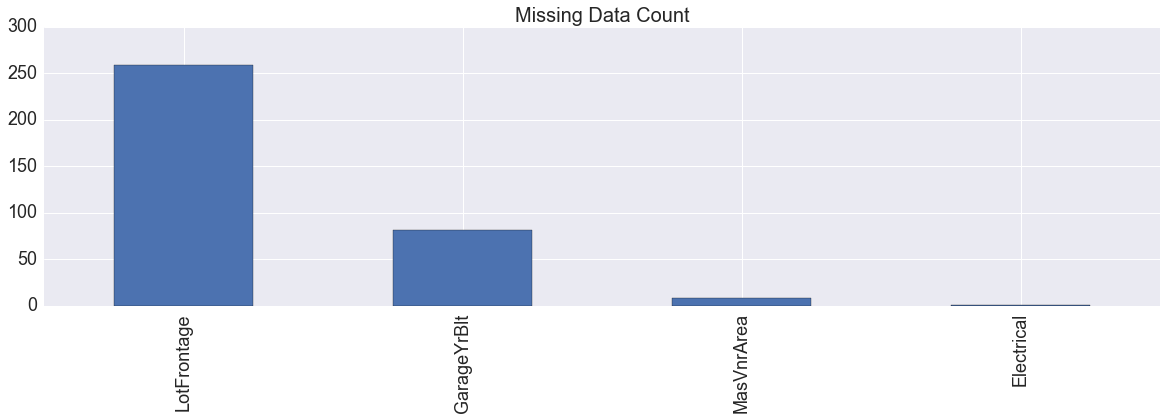

In [808]:
missing_data[missing_data["Missing_Data_Frequency"] >0].sort_values(by = "Missing_Data_Frequency", 
                                 ascending=False).plot(kind = "bar", 
                                 figsize = (20, 5),fontsize = 18, legend = False, 
                                 )
pl.title("Missing Data Count", size = 20)

In [810]:
# handling_missing_data for training data set
    
# remove feature LotFrontage becasue there are 252, ~ 17% of the data are missing
#df = df.drop("LotFrontage", axis = 1)
    
# impute the missing record with the mean value
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(int(df["GarageYrBlt"].mean()))
df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mean())

In [811]:
df["Electrical"].mode()

0    SBrkr
dtype: object

In [812]:
df["Electrical"] = df["Electrical"].fillna("SBrkr")

In [813]:
# see the numeric features again after the conversions
numeric_v = df.dtypes[df.dtypes != "object"].index

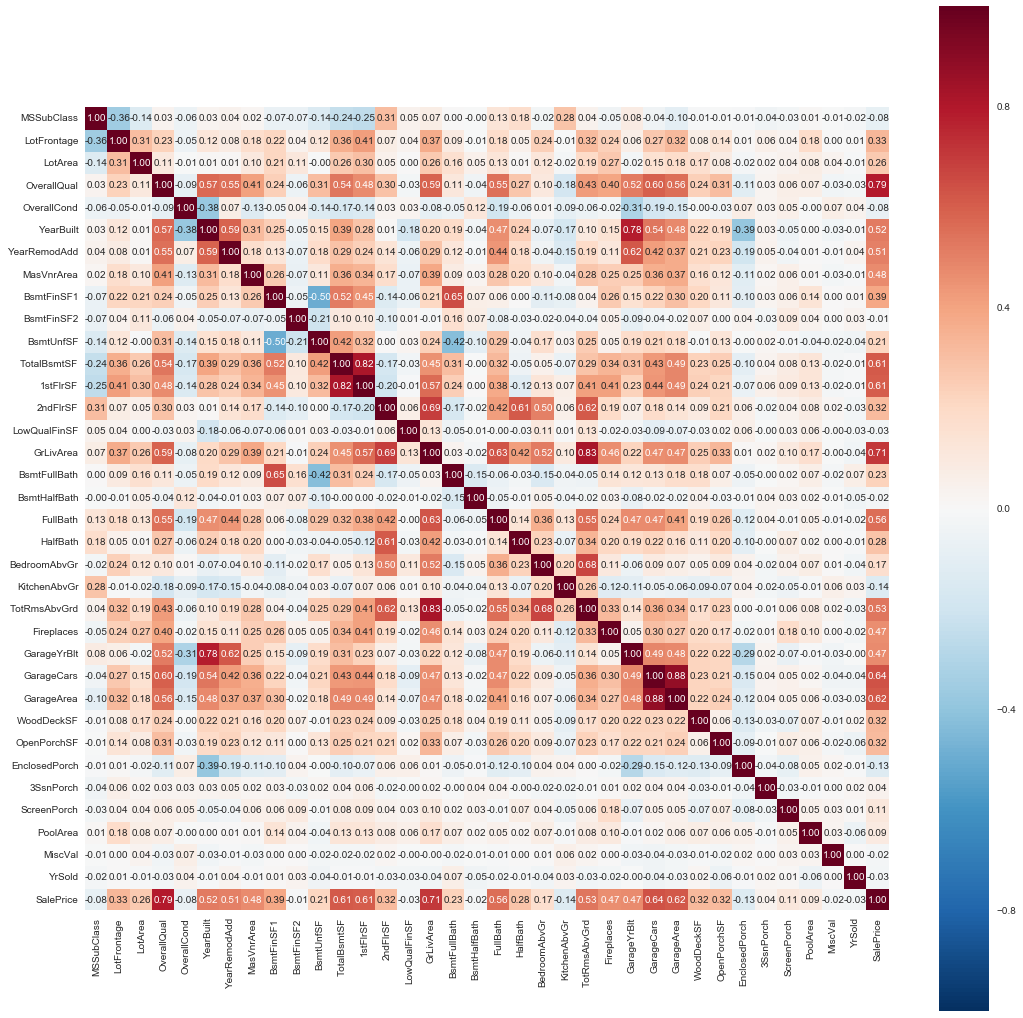

In [814]:
# plot a correlation matrix to idendify the important numeric features
import seaborn as sns

cm = np.corrcoef(df[numeric_v].values.T)

sns.set(font_scale=1)

fig, ax = pl.subplots(figsize=(18, 18))

hm = sns.heatmap(cm,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws = {'size': 10},
                 ax = ax,
                 yticklabels= numeric_v, xticklabels= numeric_v)

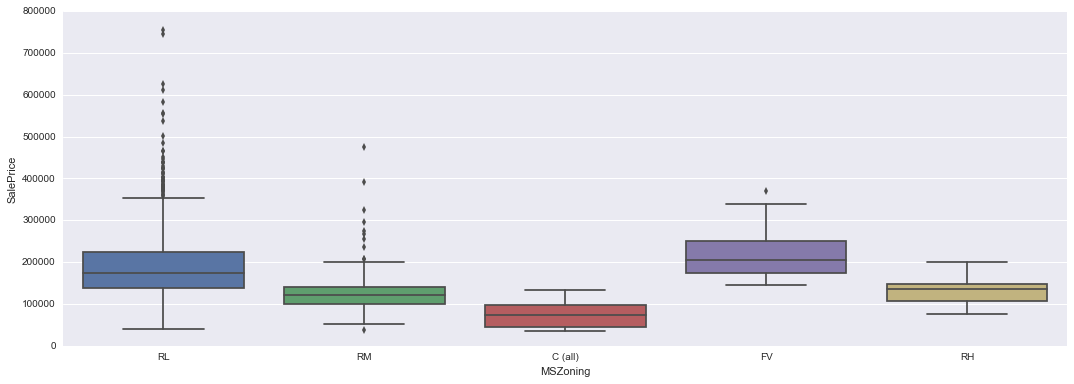

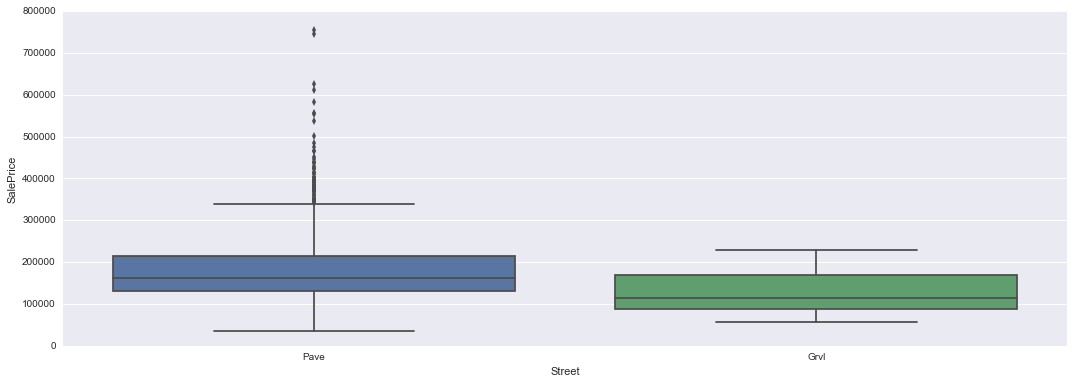

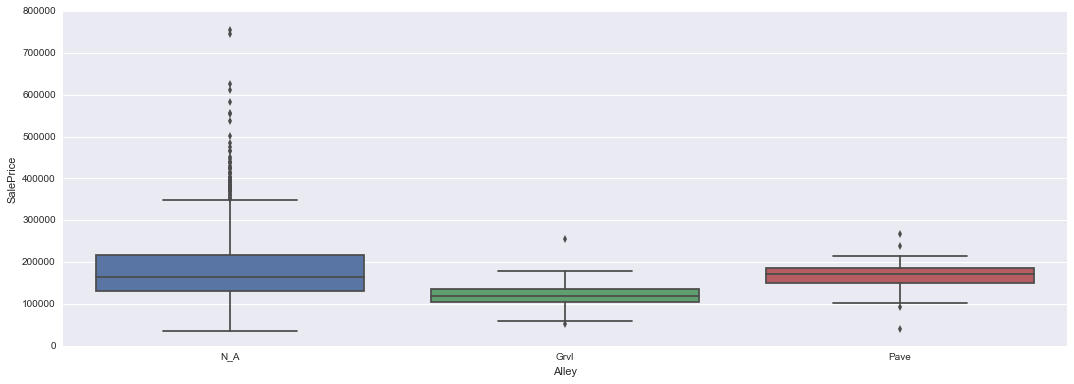

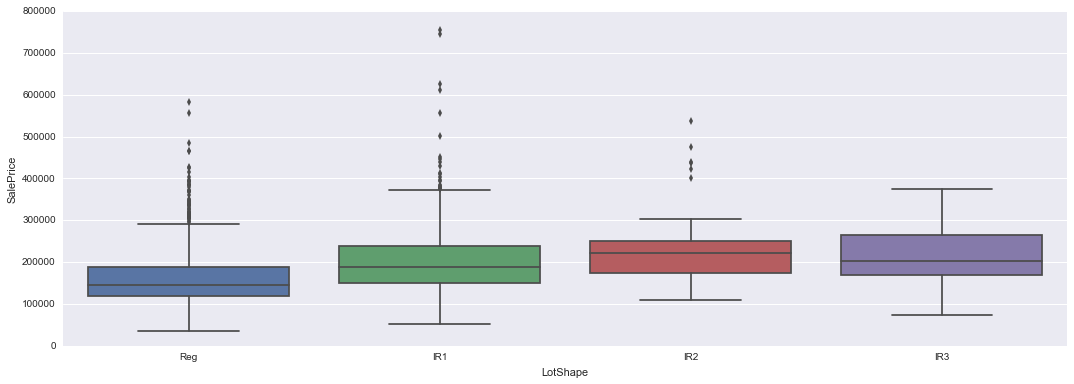

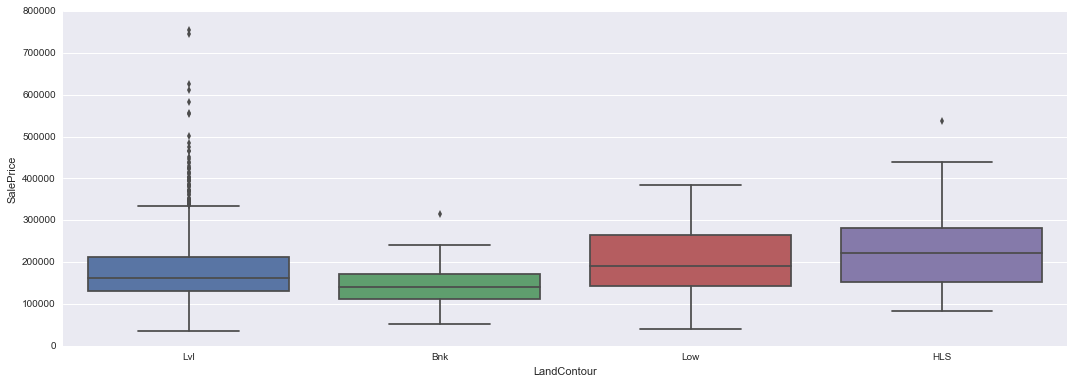

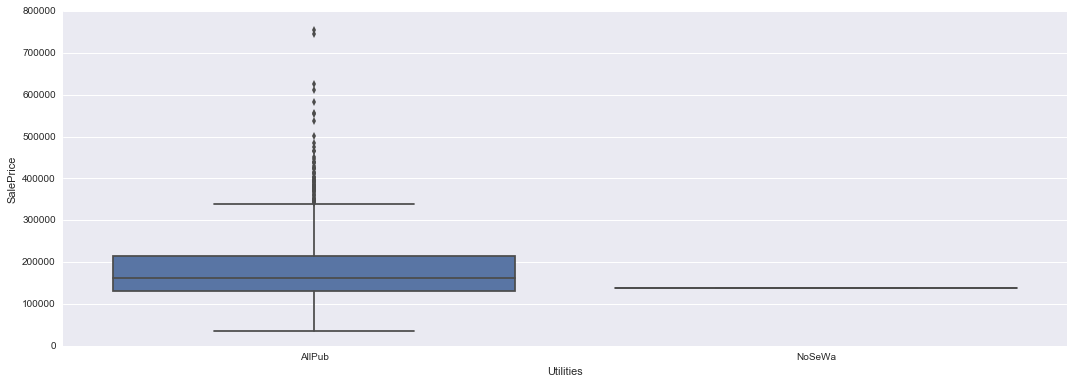

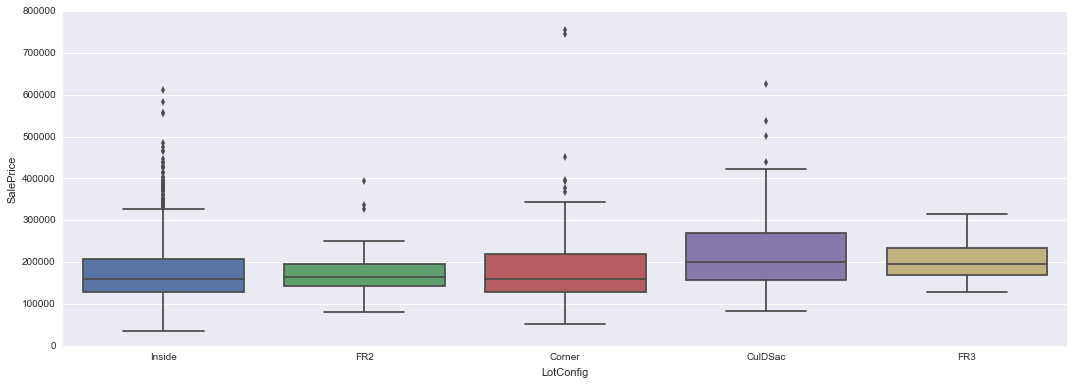

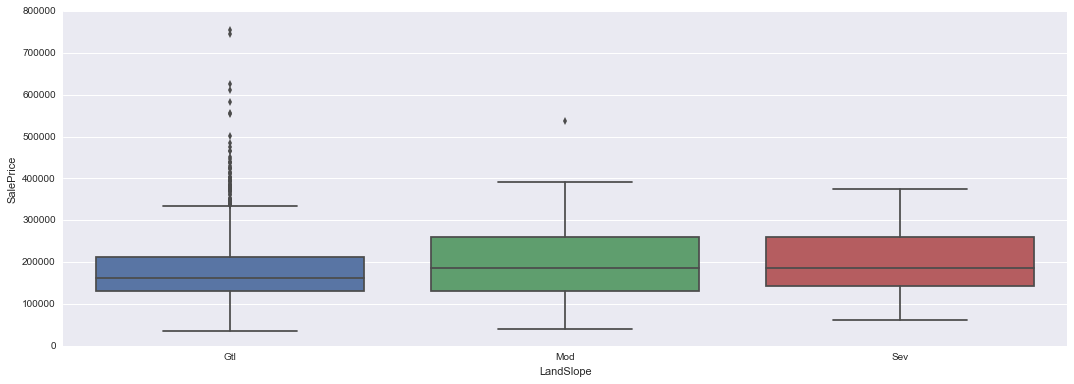

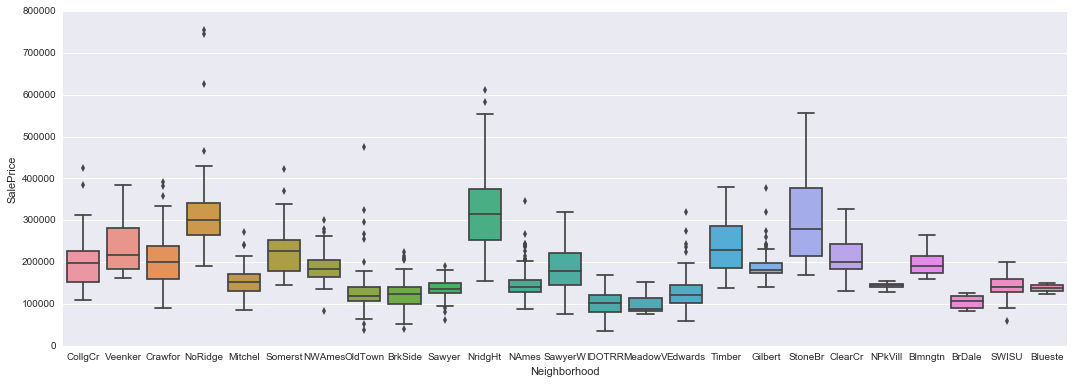

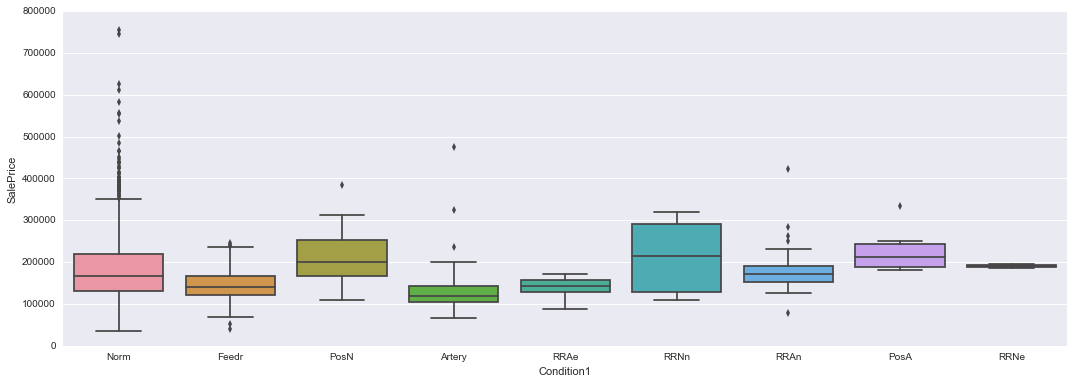

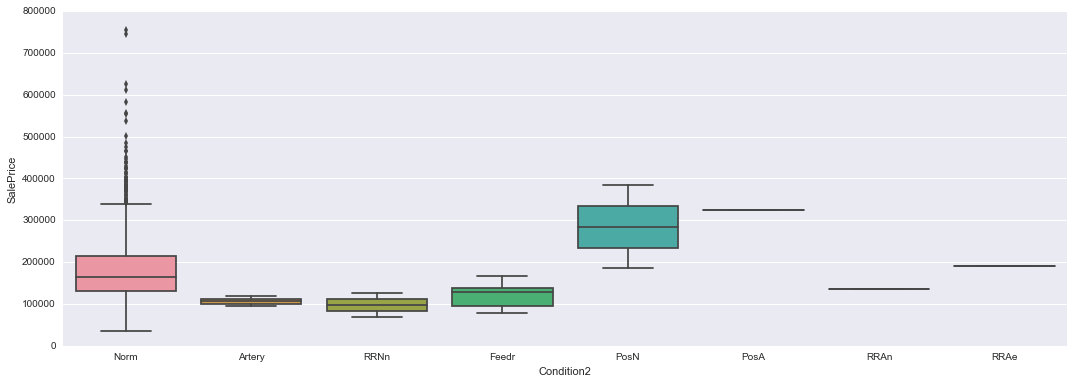

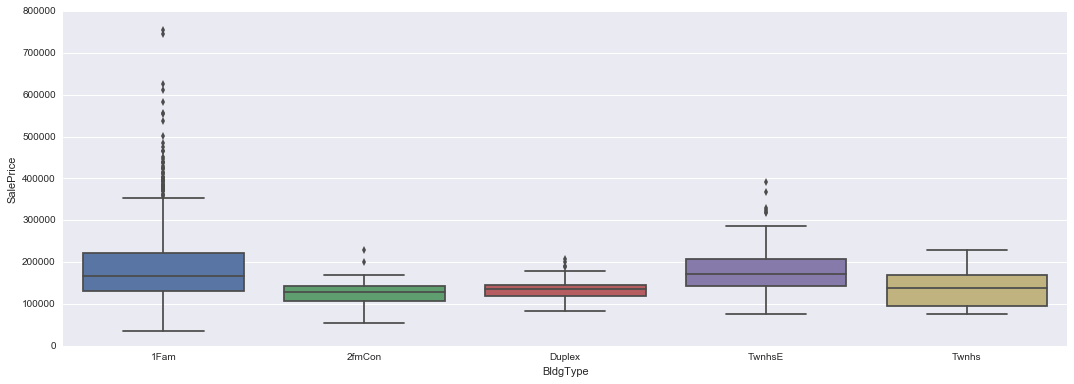

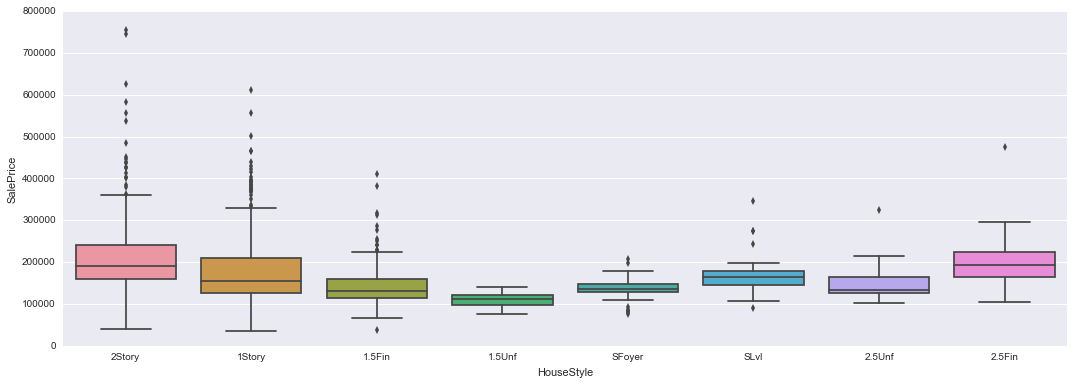

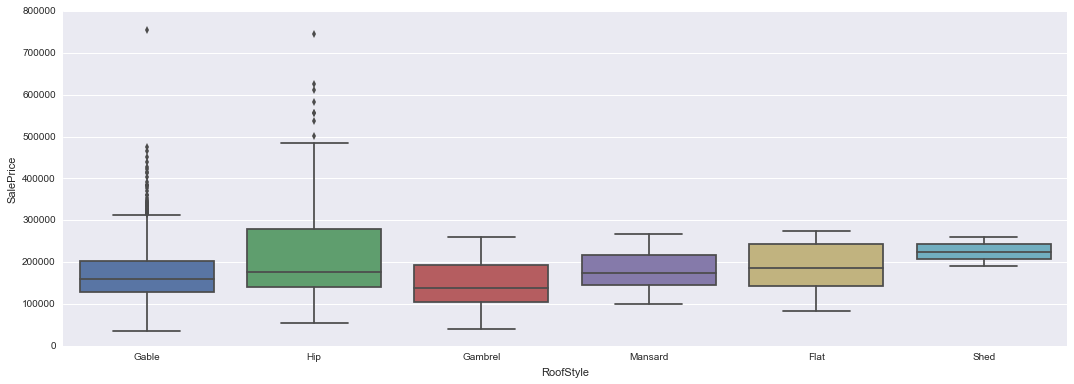

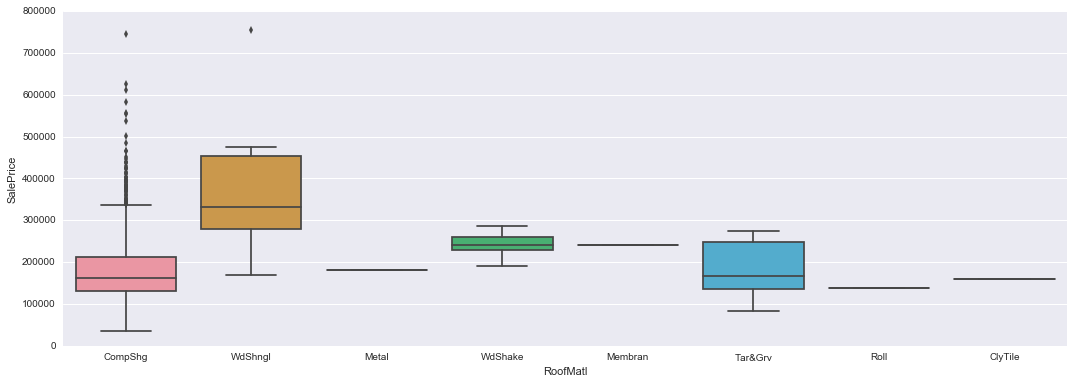

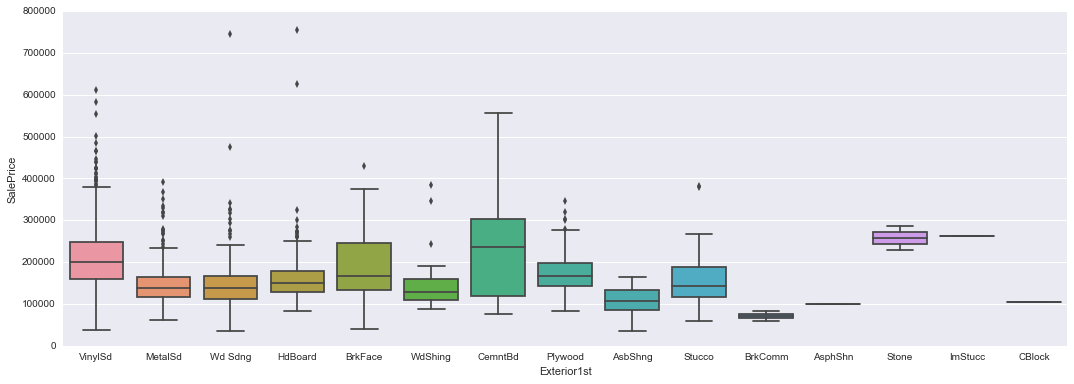

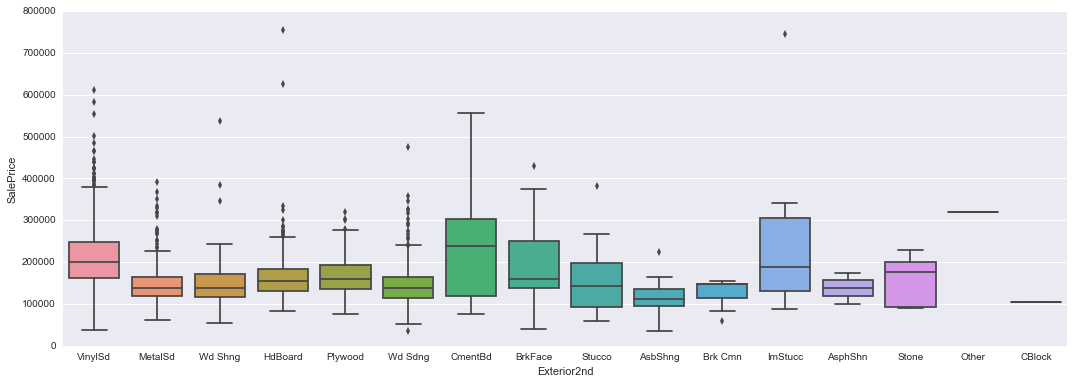

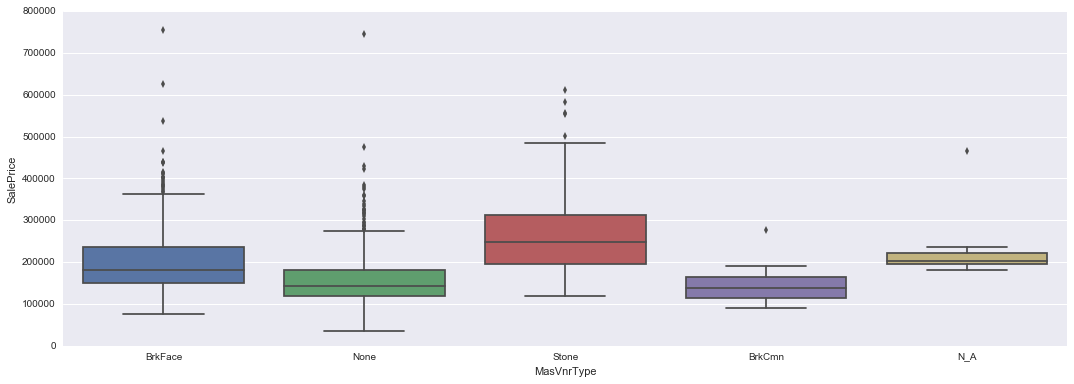

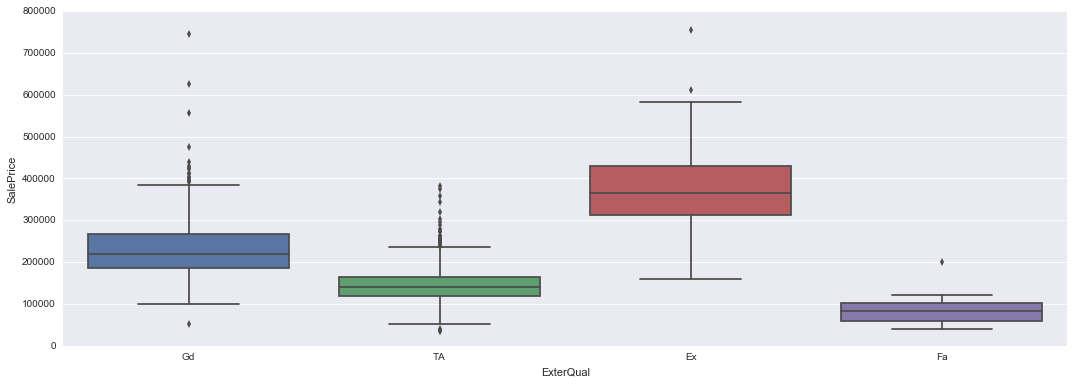

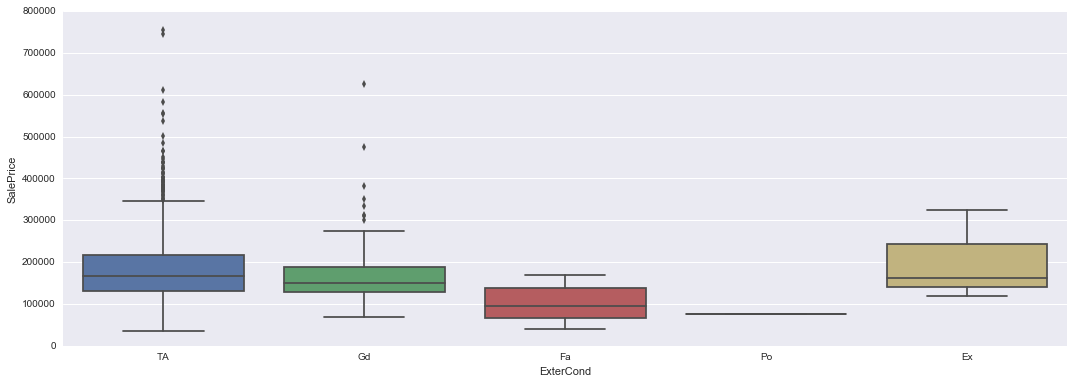

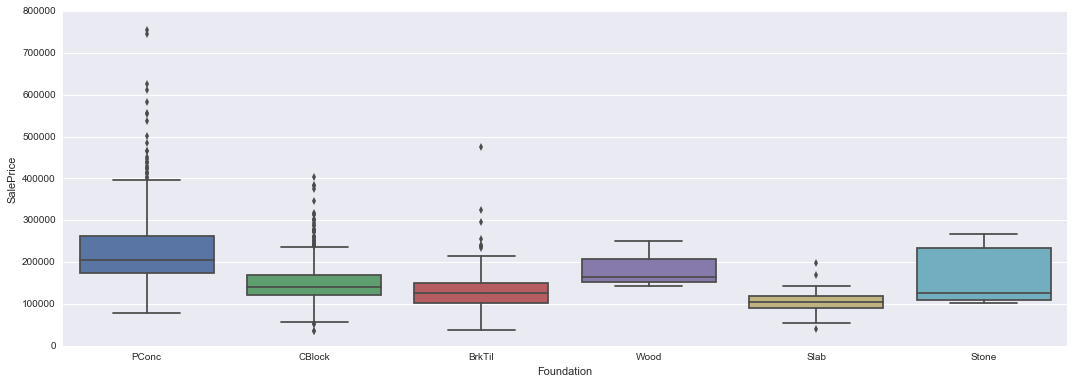

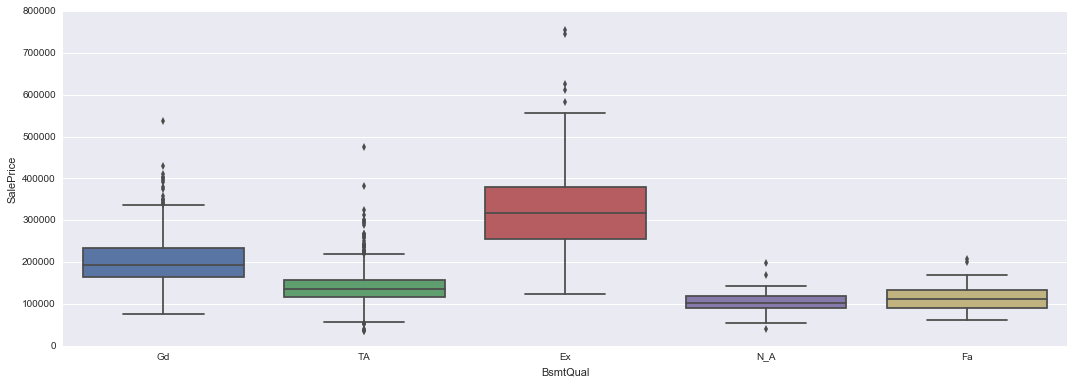

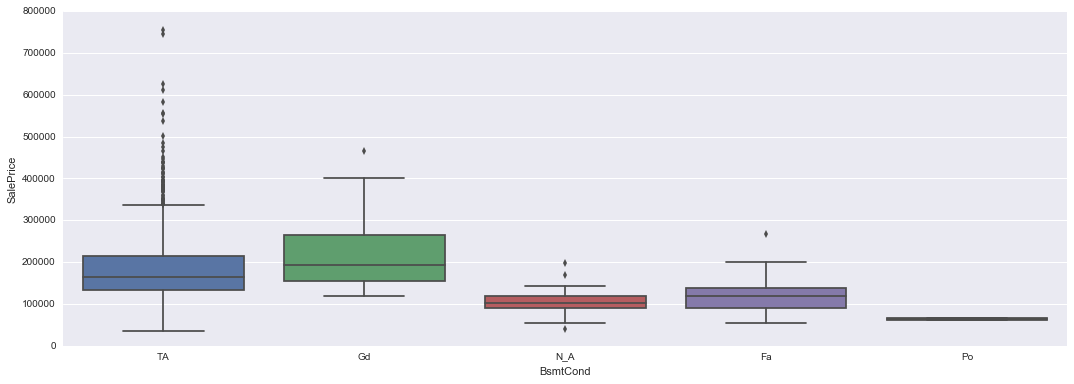

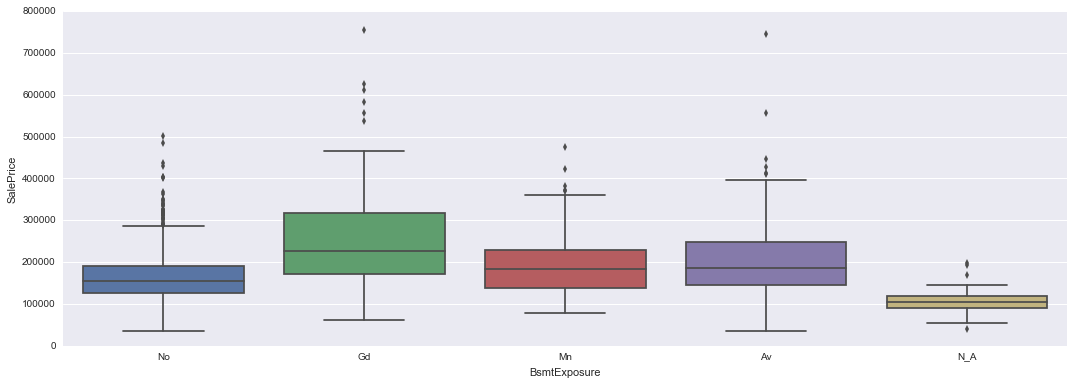

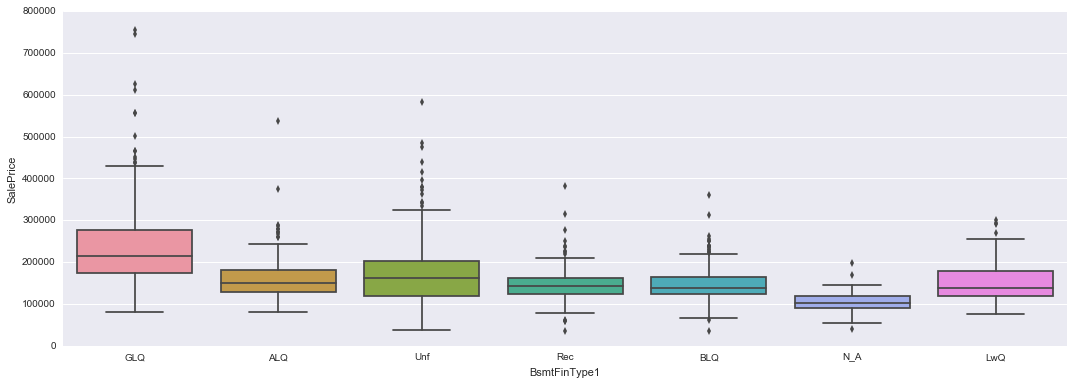

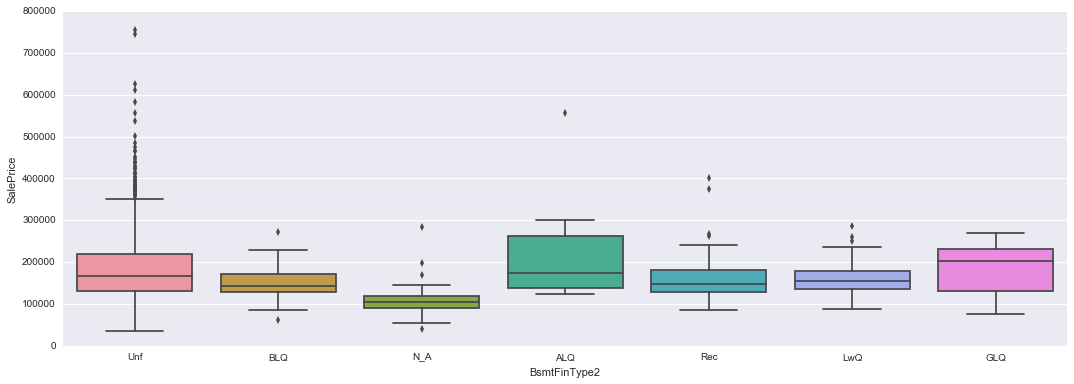

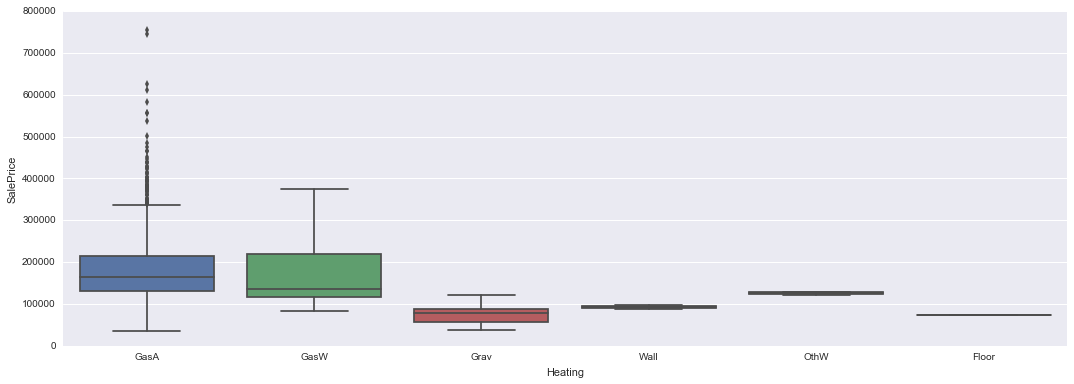

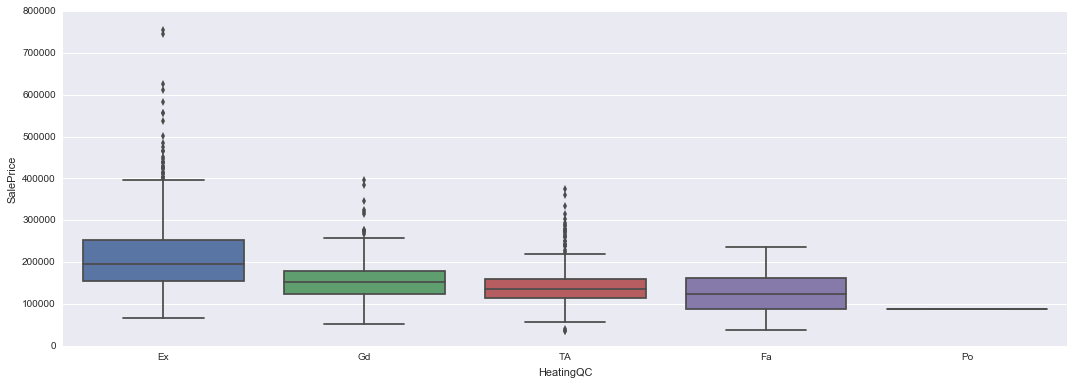

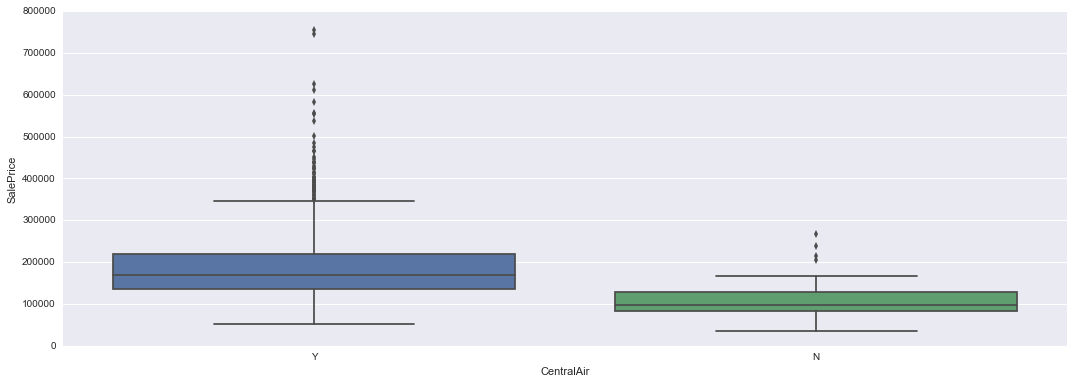

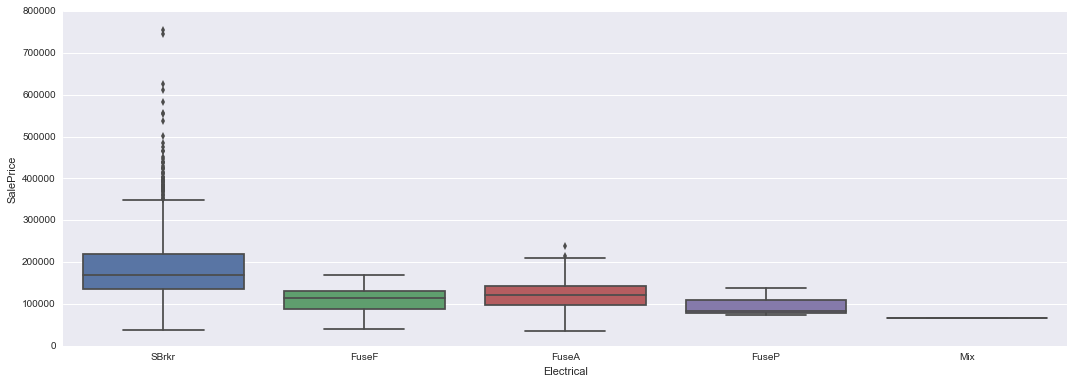

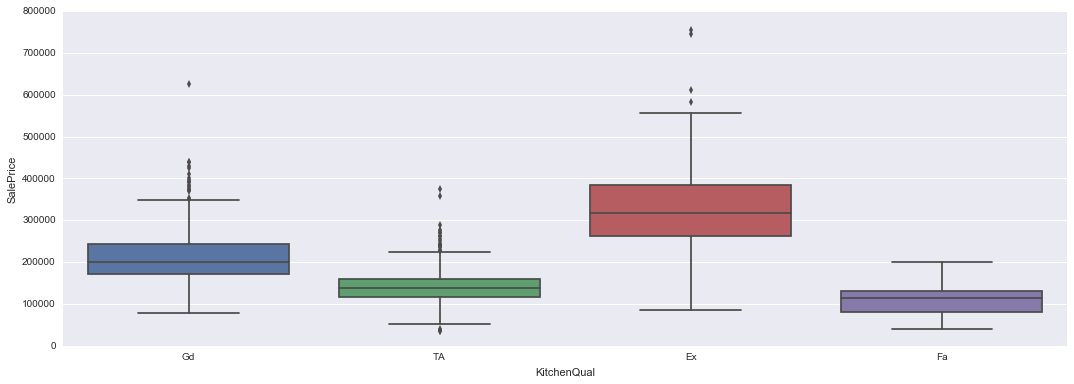

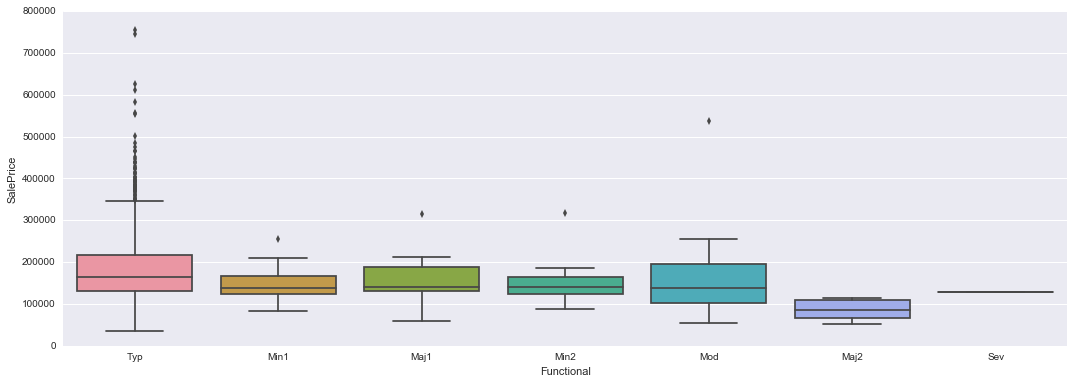

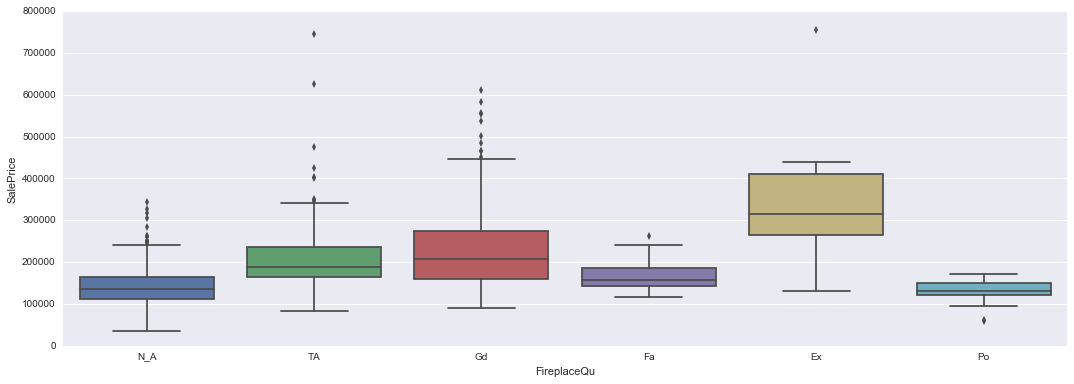

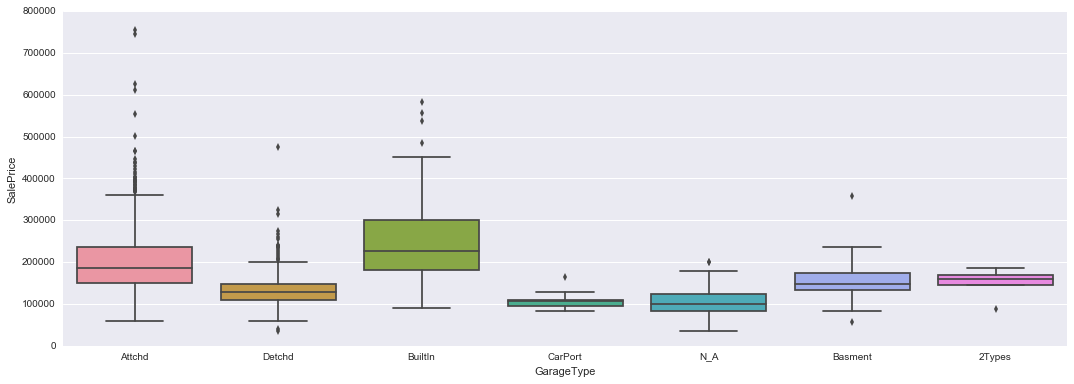

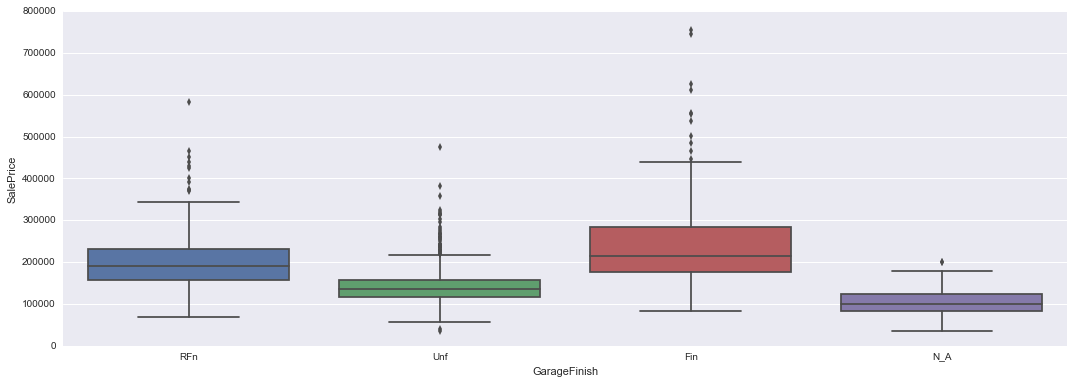

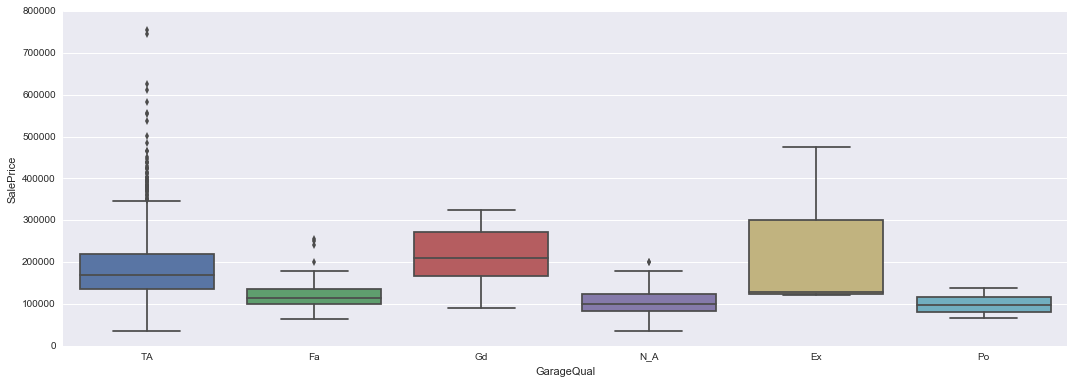

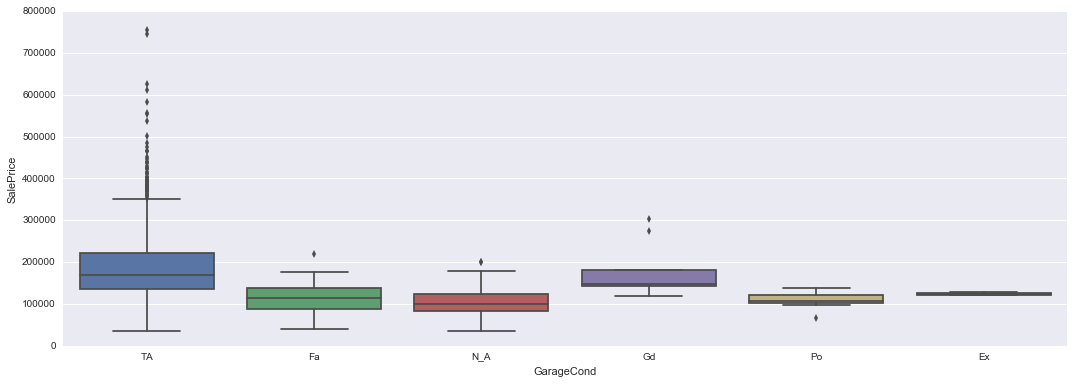

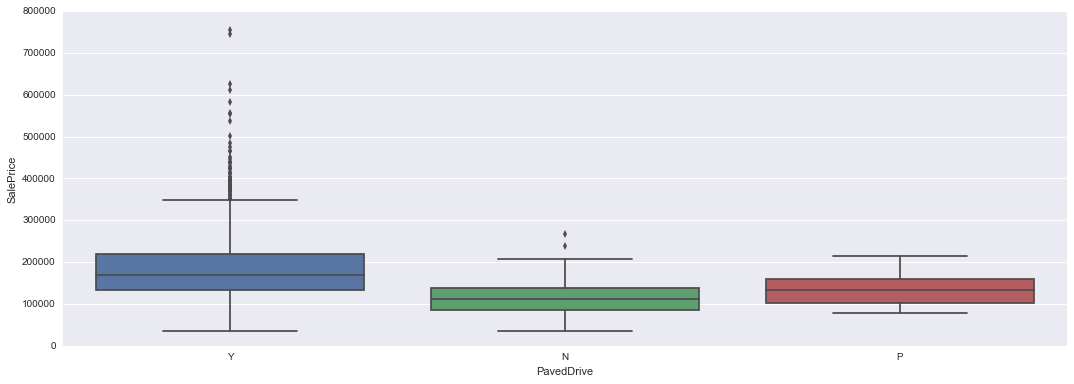

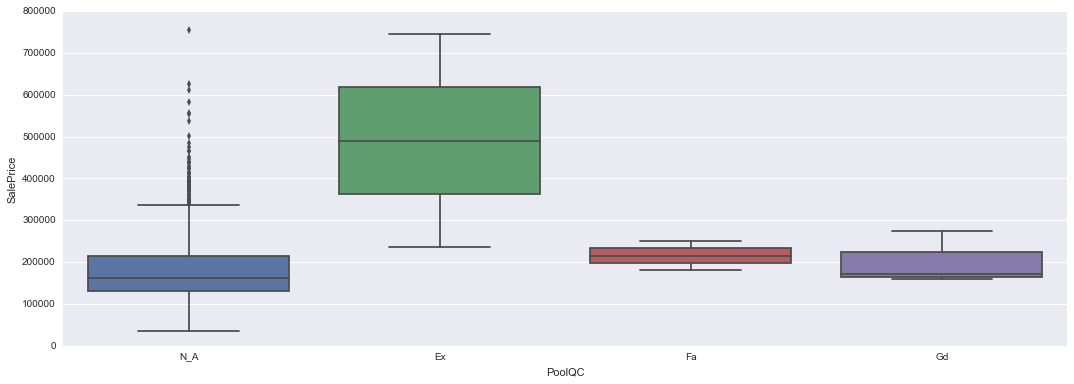

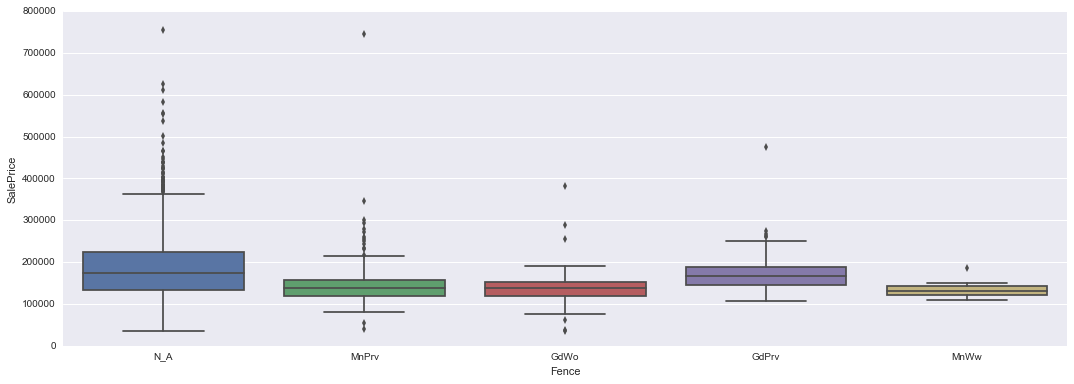

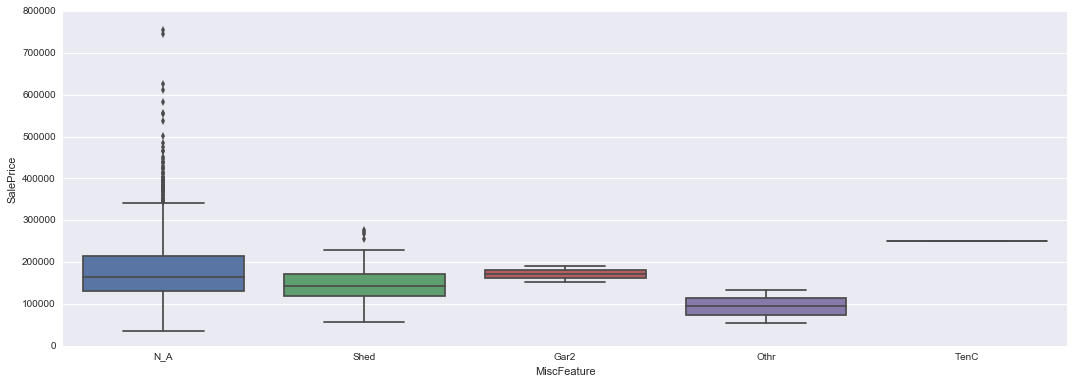

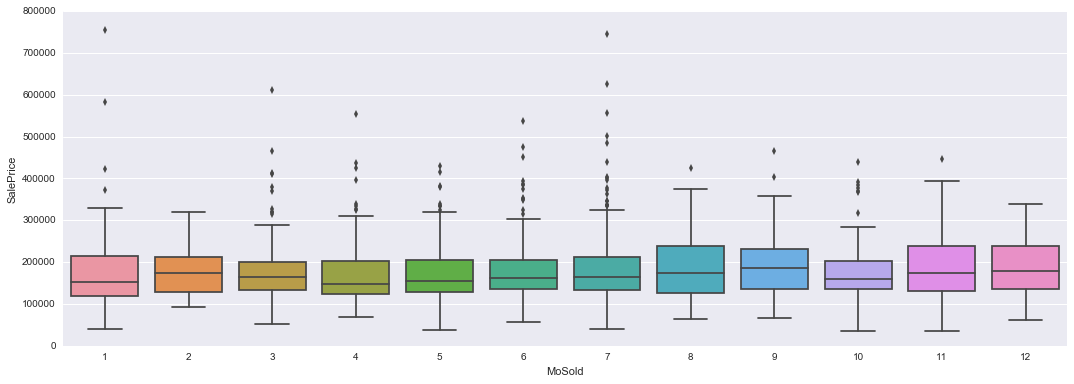

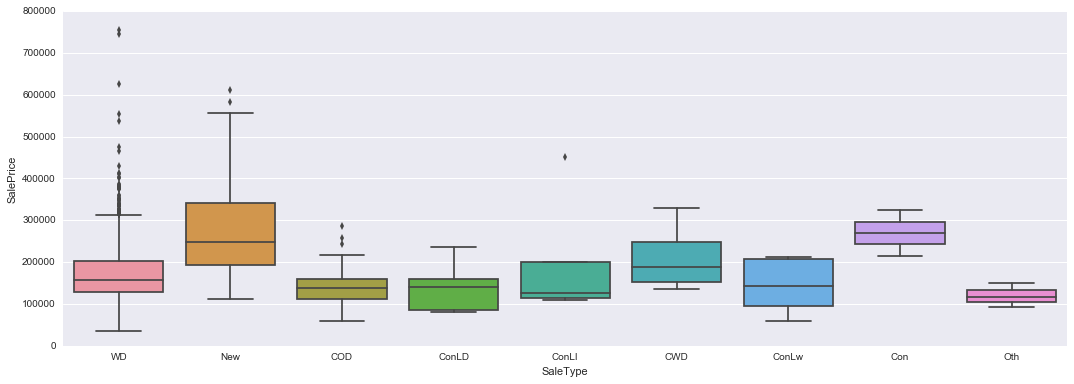

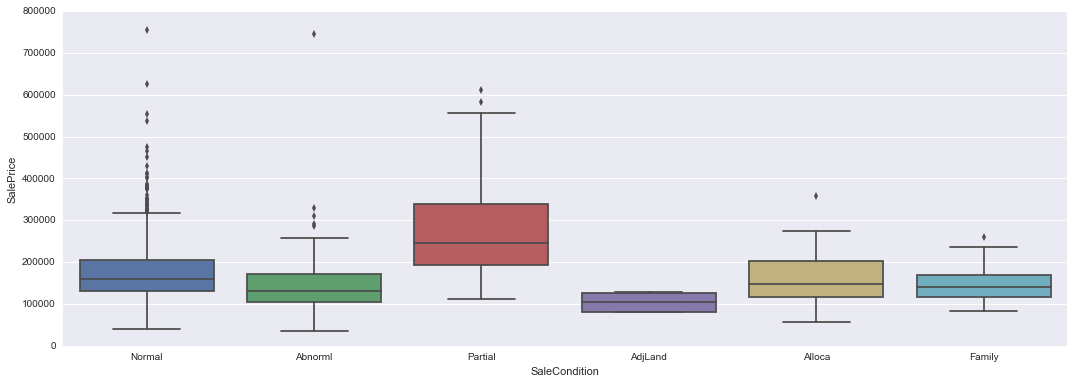

In [260]:
factor_v = df.dtypes[df.dtypes == "object"].index
for feature in factor_v:
    fig, ax = pl.subplots(figsize=(18, 6))
    feature= sns.boxplot(y="SalePrice", x=feature, data=df, ax = ax)
    pl.show()

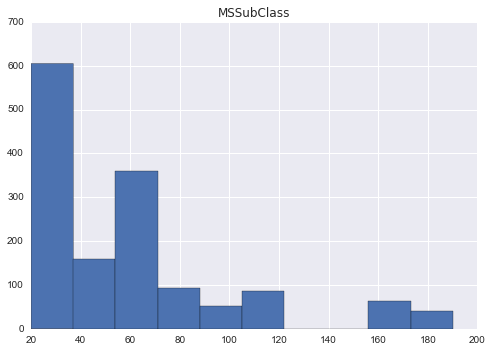

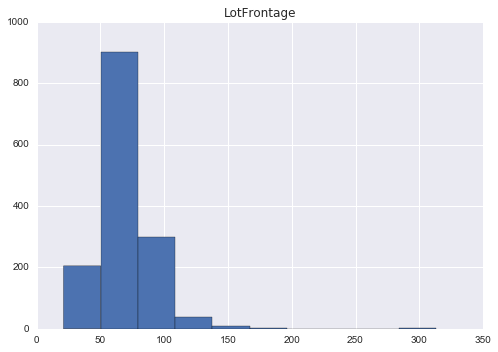

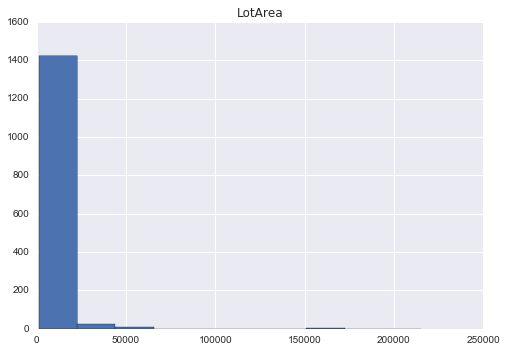

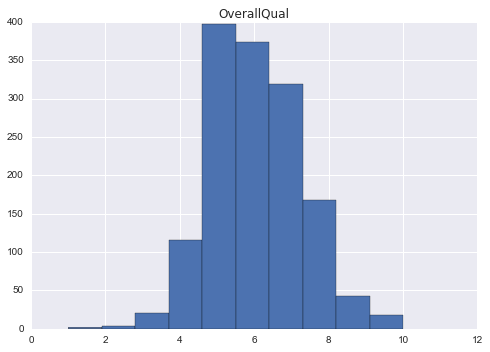

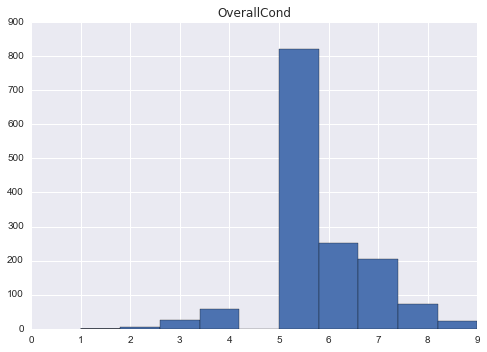

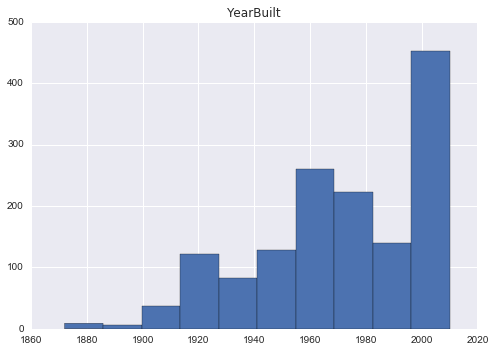

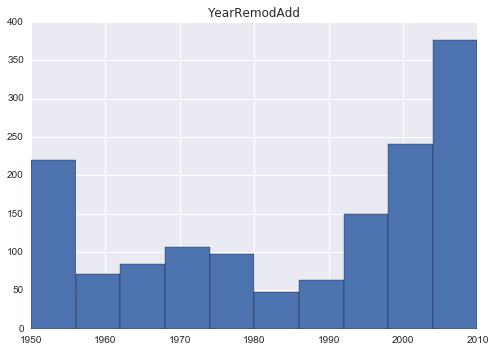

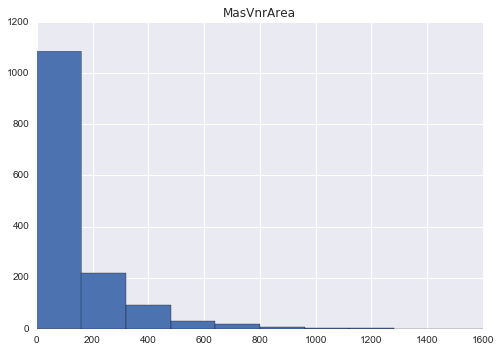

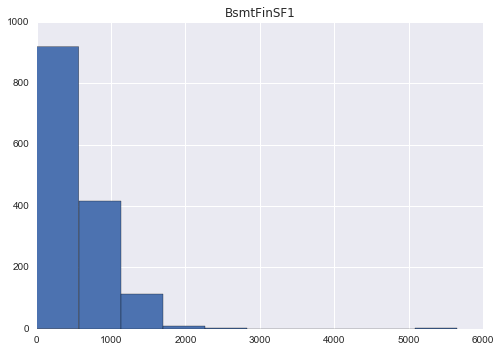

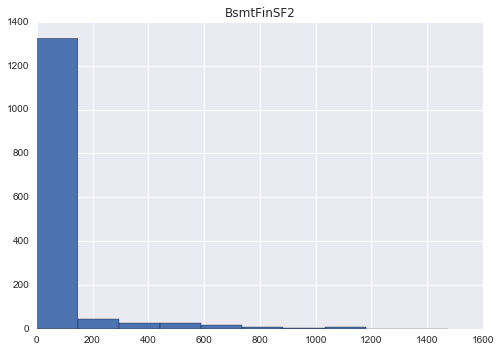

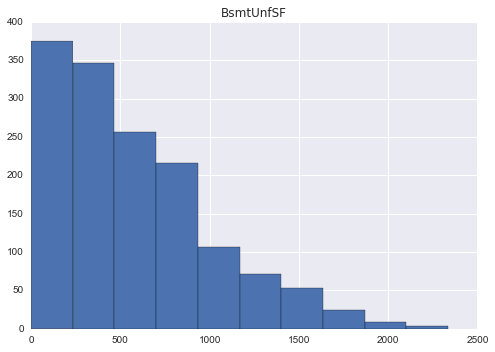

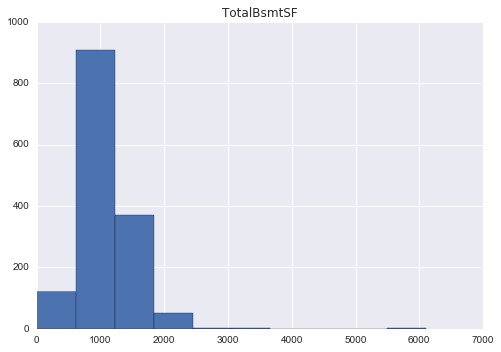

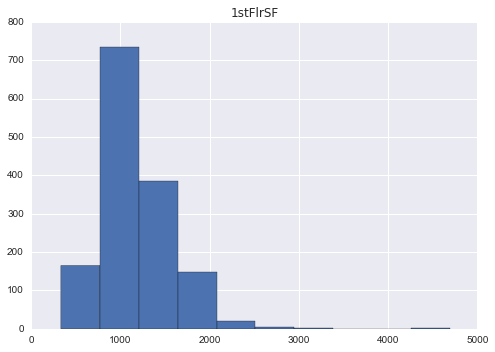

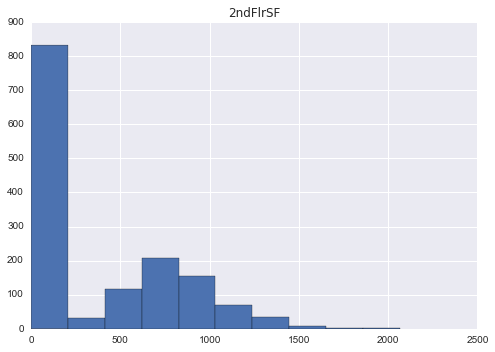

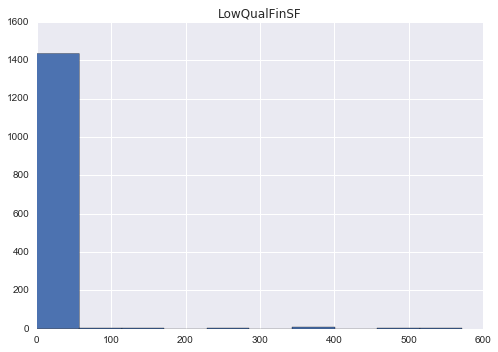

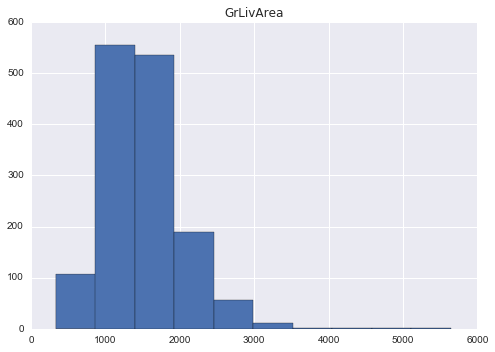

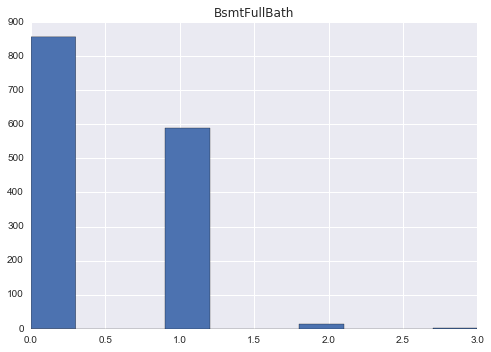

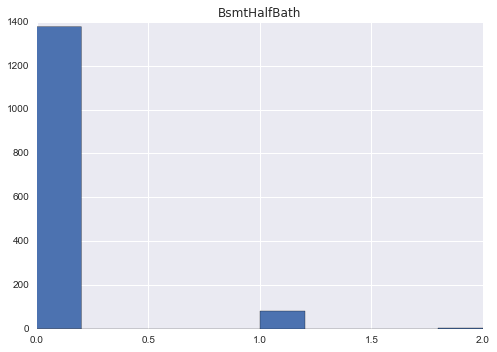

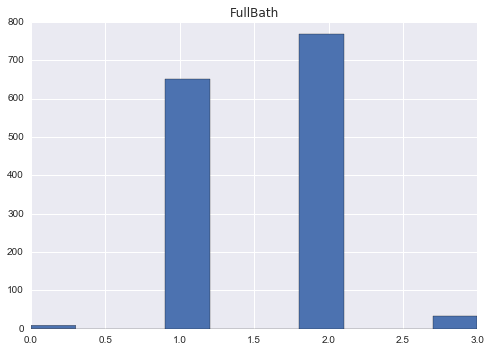

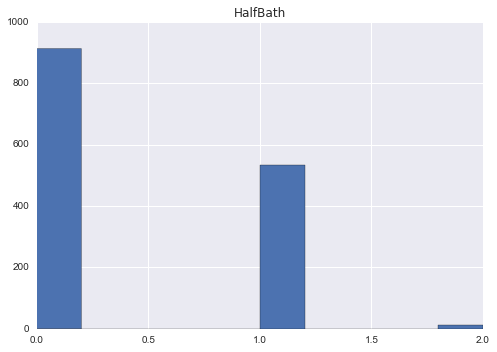

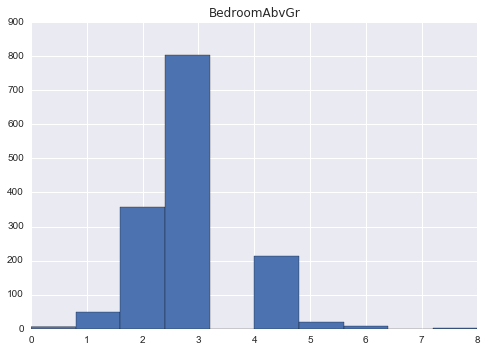

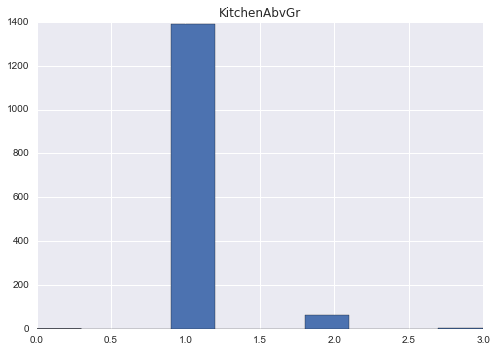

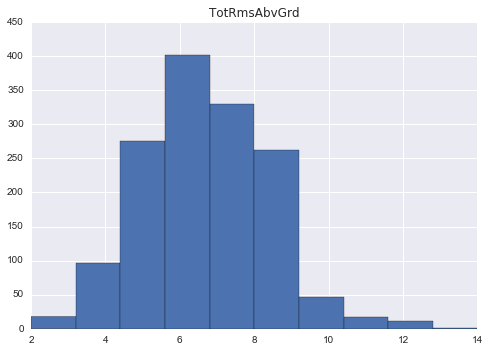

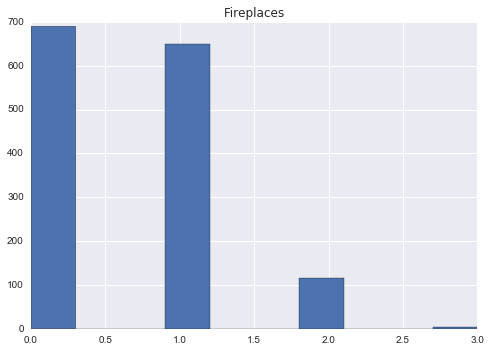

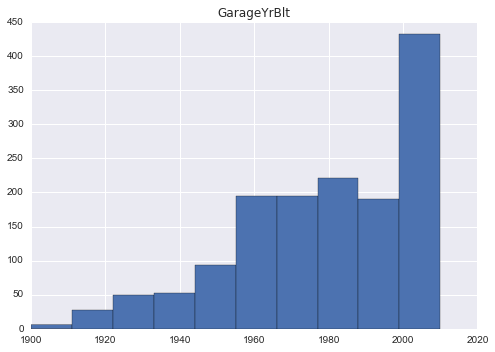

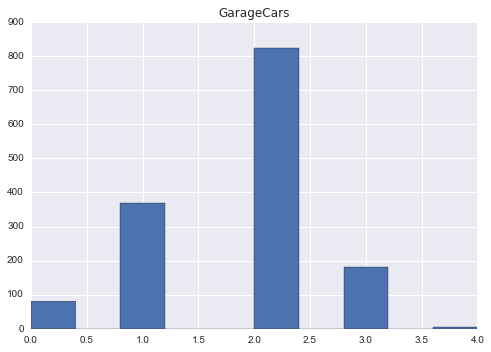

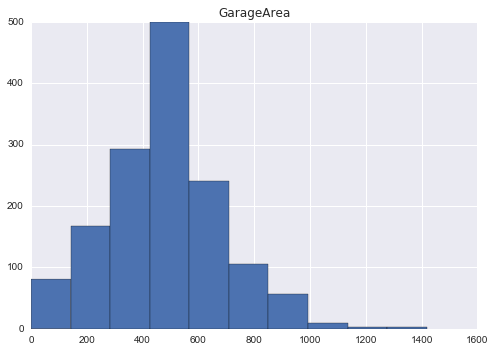

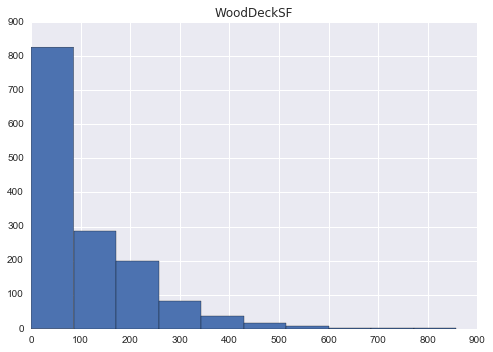

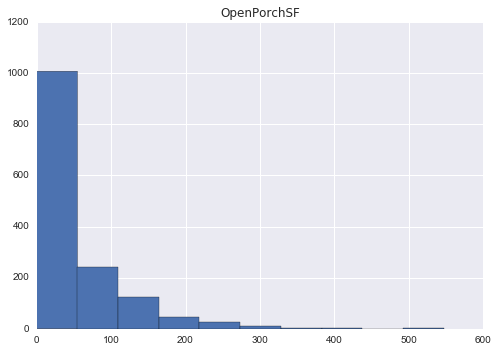

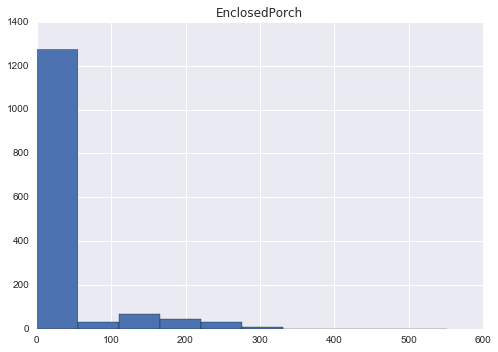

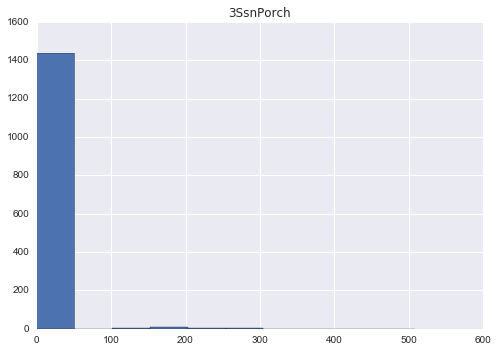

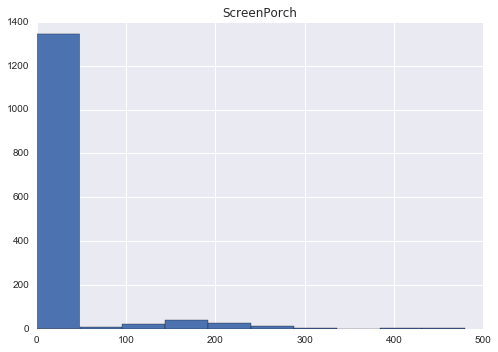

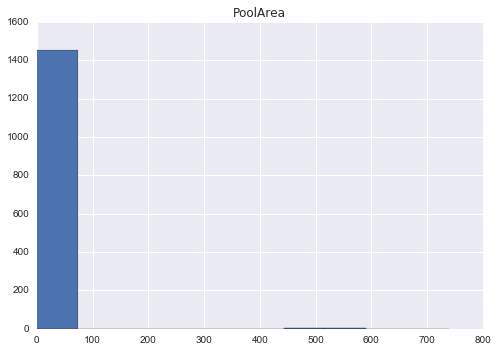

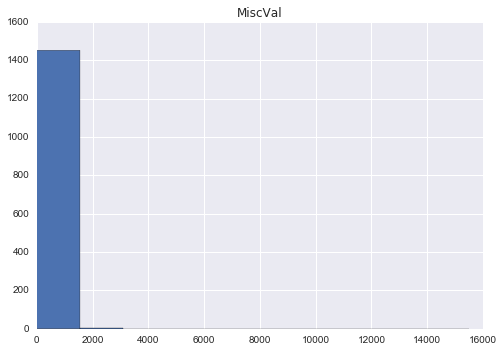

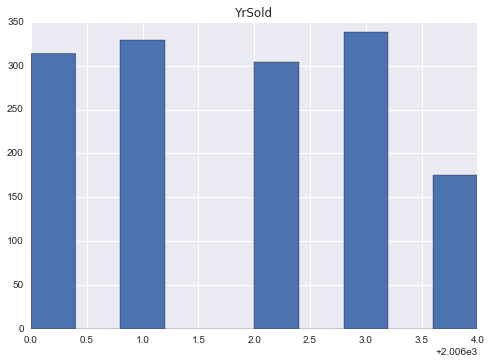

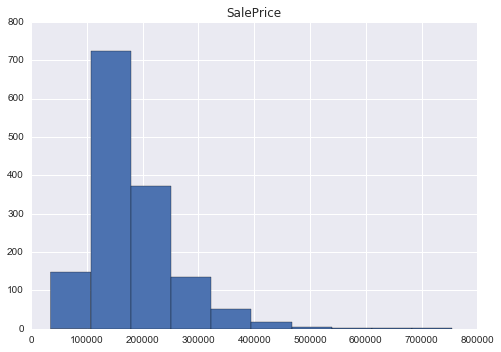

In [263]:
for feature in numeric_v:
    df.hist(column = feature)
    pl.title(feature)
    pl.show()

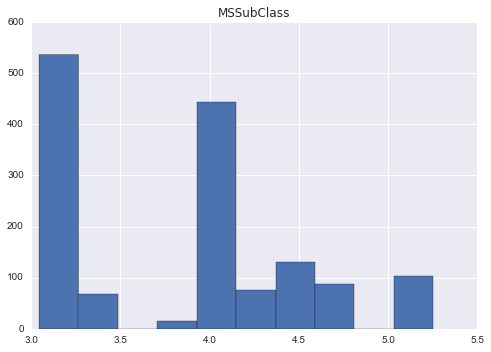

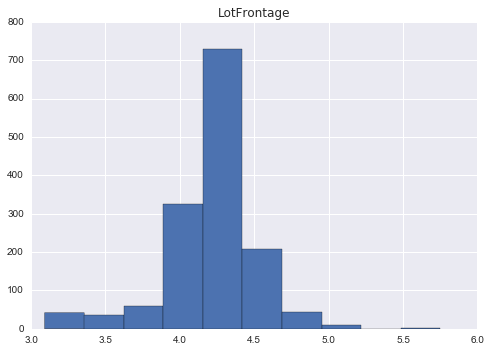

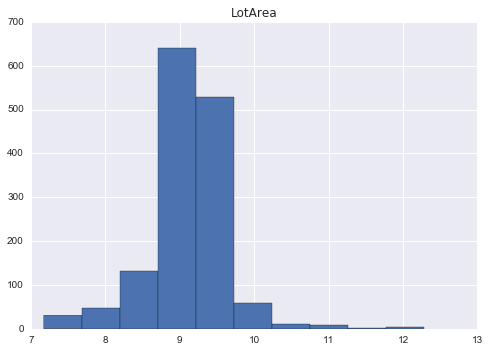

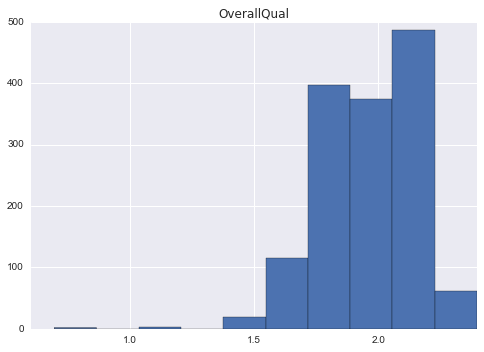

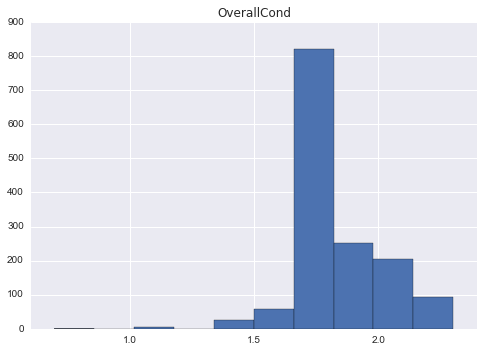

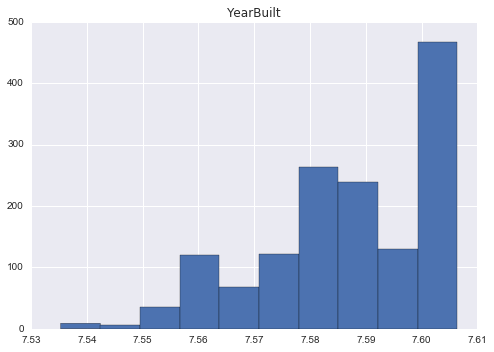

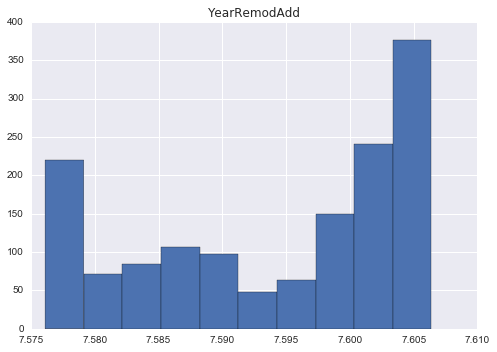

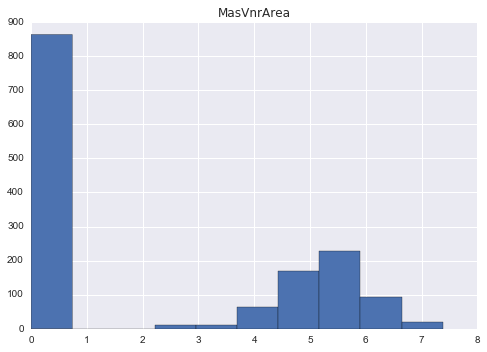

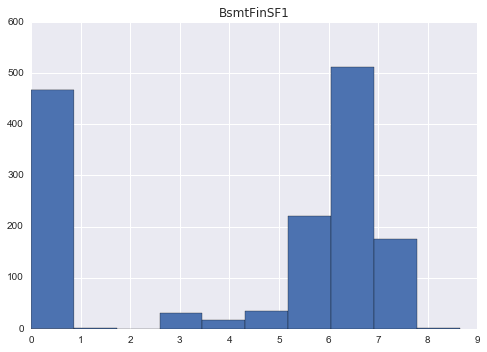

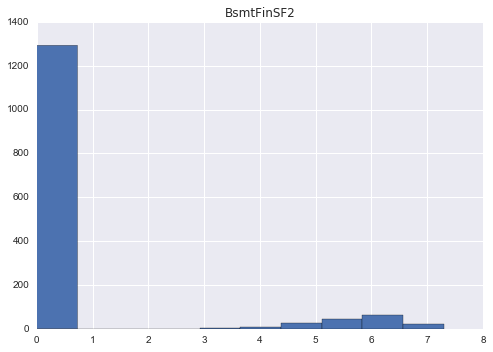

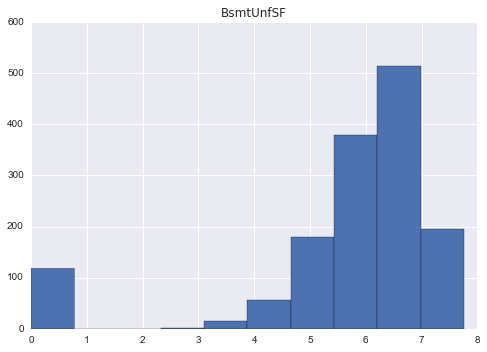

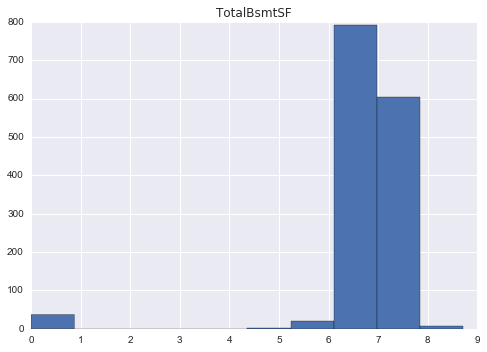

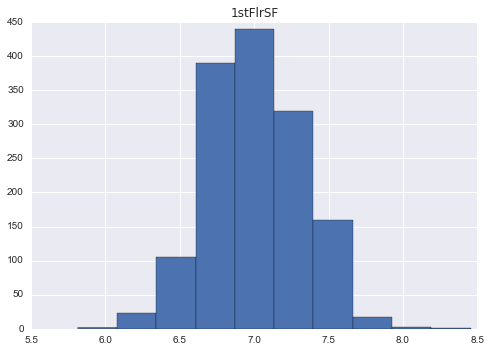

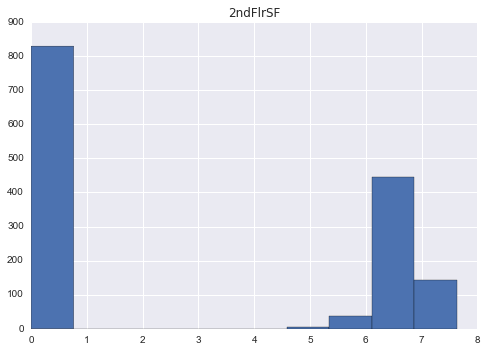

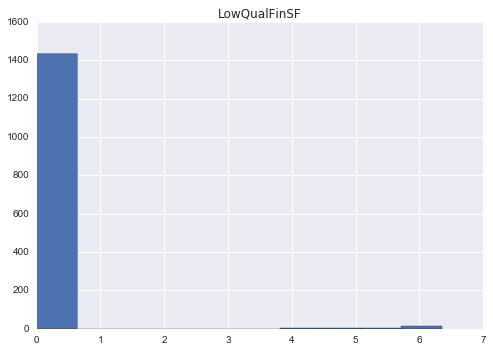

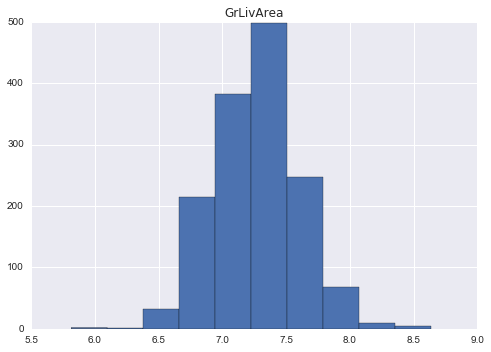

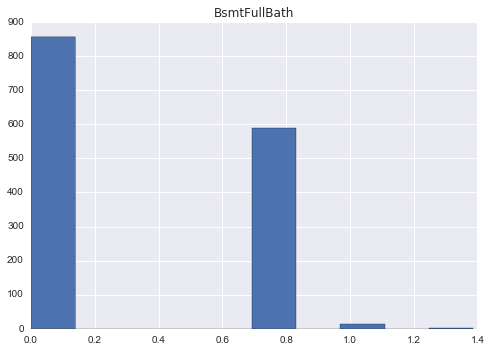

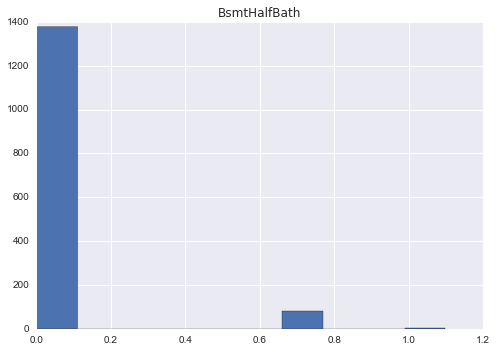

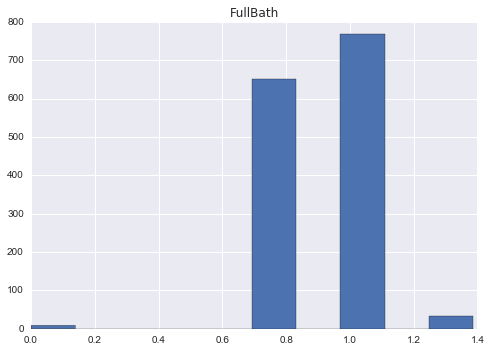

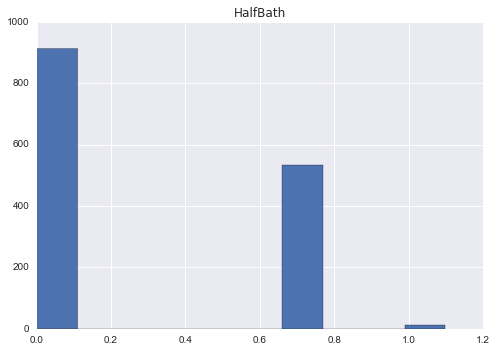

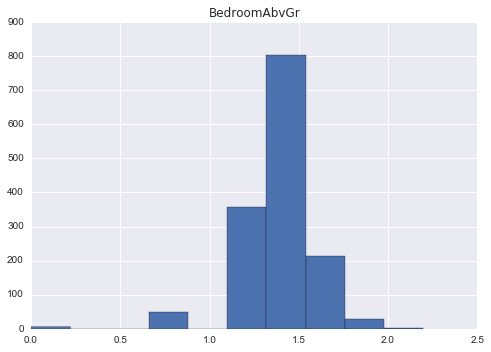

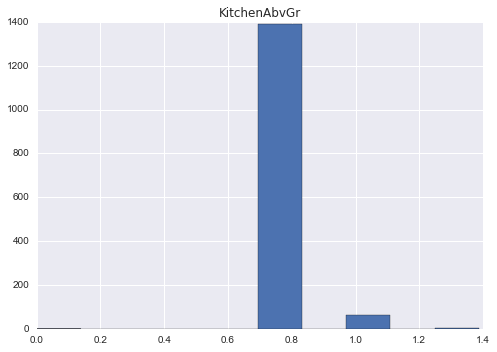

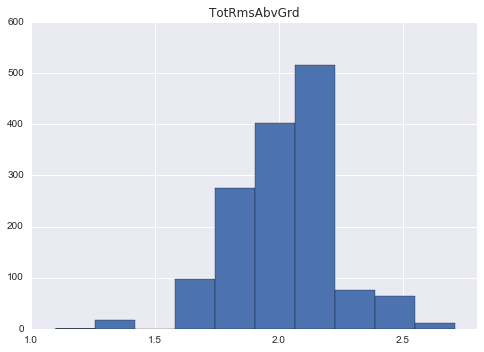

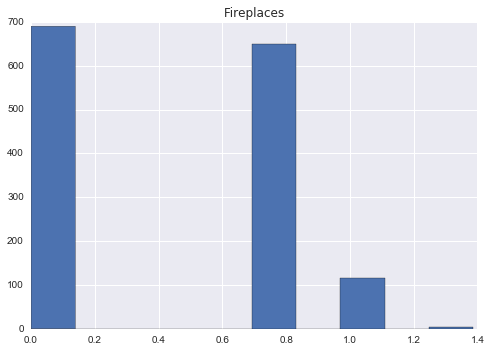

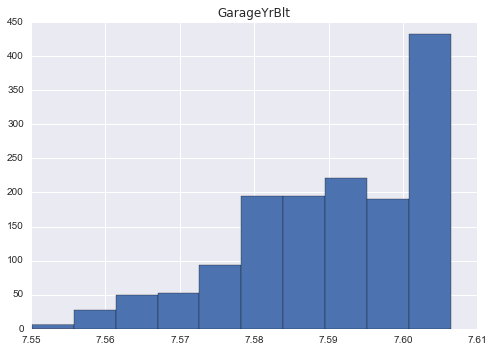

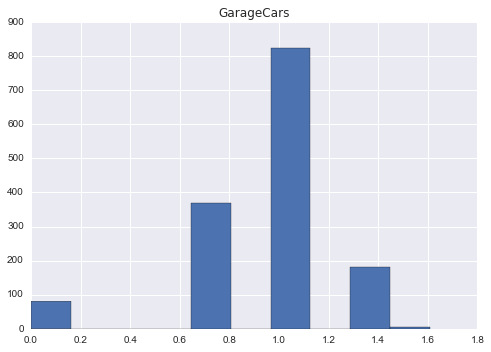

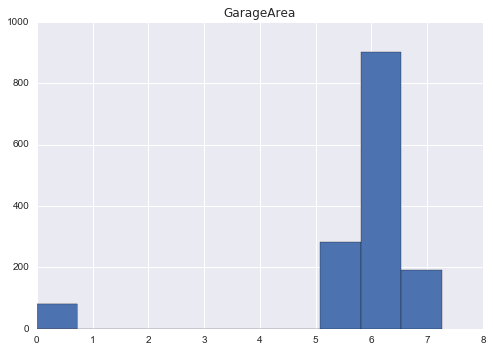

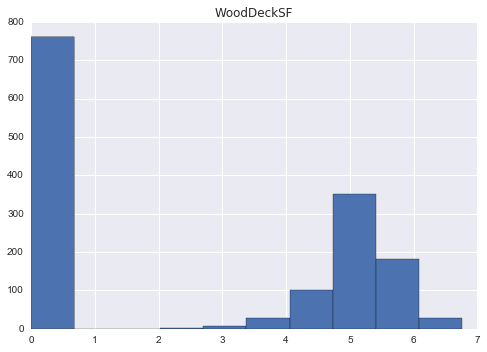

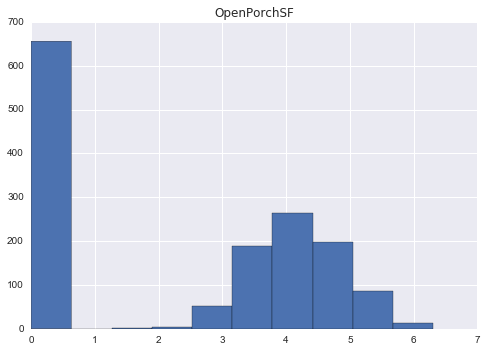

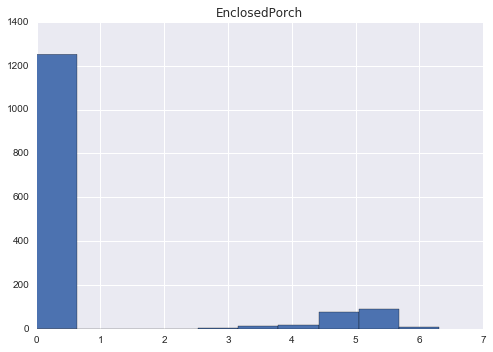

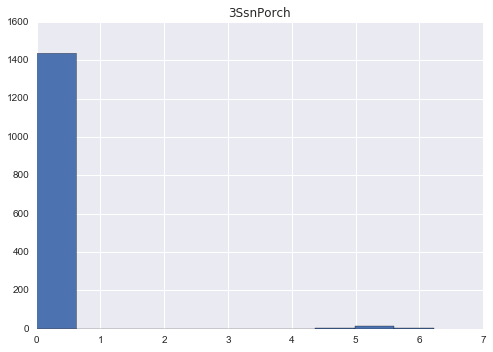

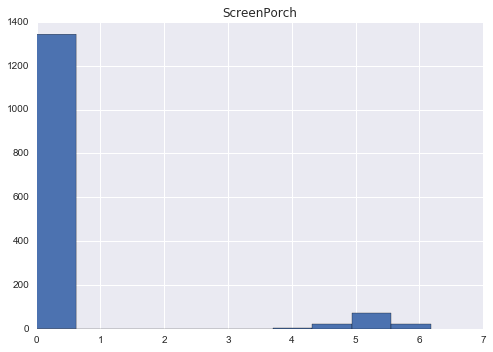

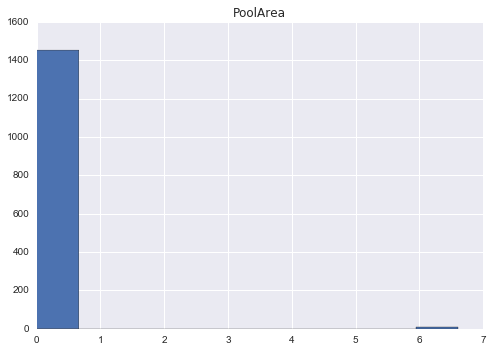

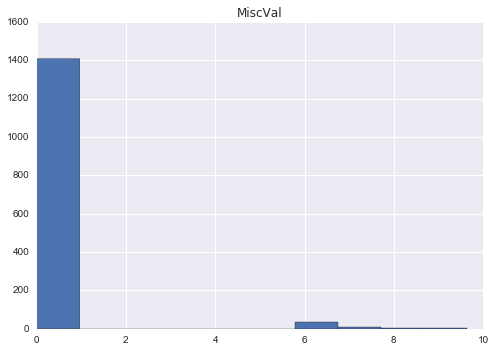

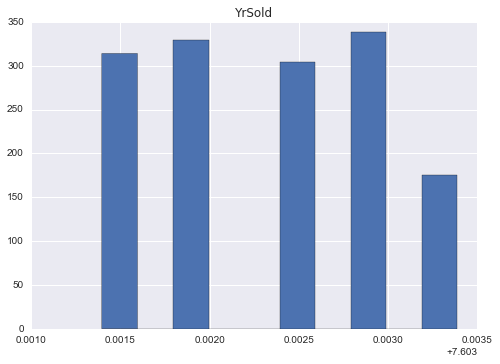

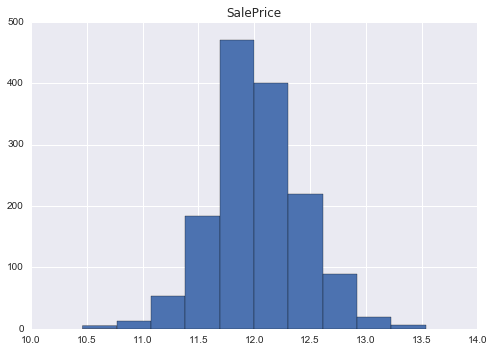

In [264]:
for feature in numeric_v:
    df[feature] = np.log1p(df[feature])
    df.hist(column = feature)
    pl.title(feature)
    pl.show()

In [265]:
all_data = pd.get_dummies(df)

In [266]:
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.818794,4.217092,9.110966,1.940309,1.869266,7.586821,7.593756,2.145749,4.229731,0.655398,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,0.688354,0.314733,0.517369,0.201983,0.168400,0.015389,0.010424,2.630626,2.992052,1.845045,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,3.044522,3.091042,7.170888,0.693147,0.693147,7.535297,7.576097,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.044522,4.110874,8.929898,1.791759,1.791759,7.578145,7.584773,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.931826,4.263383,9.156887,1.945910,1.791759,7.587817,7.598399,0.000000,5.951943,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.262680,4.382027,9.358976,2.079442,1.945910,7.601402,7.603399,5.107456,6.569832,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.252273,5.749393,12.279537,2.397895,2.302585,7.606387,7.606387,7.378384,8.638525,7.296413,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [267]:
# work on the test data for submission
df_test = dataTypeConvert(df_test)
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,N_A,Reg,Lvl,AllPub,Inside,...,120,0,N_A,MnPrv,N_A,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,N_A,IR1,Lvl,AllPub,Corner,...,0,0,N_A,N_A,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,N_A,IR1,Lvl,AllPub,Inside,...,0,0,N_A,MnPrv,N_A,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,N_A,IR1,Lvl,AllPub,Inside,...,0,0,N_A,N_A,N_A,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,N_A,IR1,HLS,AllPub,Inside,...,144,0,N_A,N_A,N_A,0,1,2010,WD,Normal


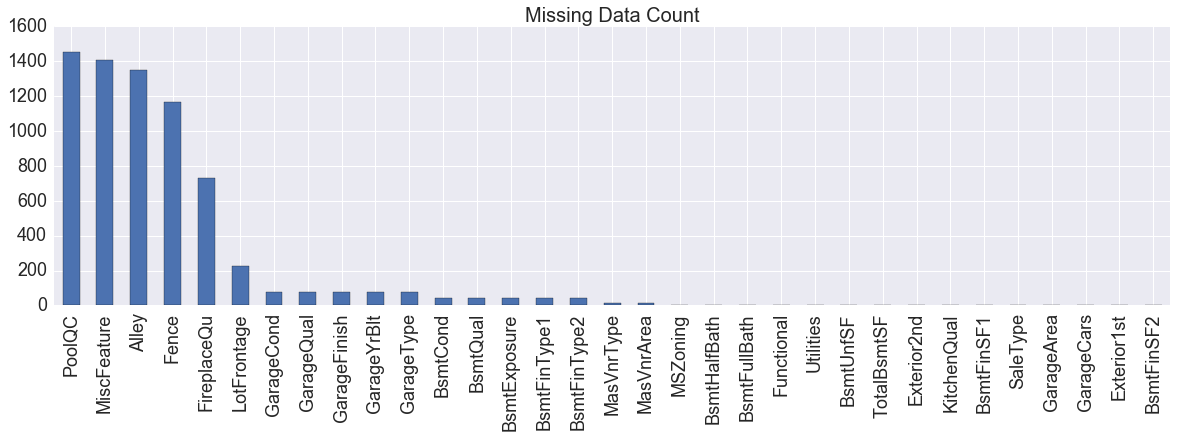

In [809]:
missing_data_test = missing_data_count(df_test)
missing_data_test.loc[missing_data_test["Missing_Data_Frequency"] > 0]
missing_data_test[missing_data_test["Missing_Data_Frequency"] >0].sort_values(by = "Missing_Data_Frequency", 
                                 ascending=False).plot(kind = "bar", 
                                 figsize = (20, 5),fontsize = 18, legend = False, 
                                 )
pl.title("Missing Data Count", size = 20)

In [269]:
test_features_with_missing_data = missing_data_test.loc[missing_data_test["Missing_Data_Frequency"] > 0].index.values
df_test[test_features_with_missing_data].dtypes

BsmtUnfSF       float64
Exterior1st      object
Utilities        object
SaleType         object
MasVnrArea      float64
BsmtFullBath    float64
LotFrontage     float64
BsmtHalfBath    float64
TotalBsmtSF     float64
BsmtFinSF2      float64
GarageYrBlt     float64
MSZoning         object
Exterior2nd      object
KitchenQual      object
BsmtFinSF1      float64
Functional       object
GarageArea      float64
GarageCars      float64
dtype: object

In [270]:
test_numeric_v_with_missing_data = df_test[test_features_with_missing_data].dtypes[
                                    df_test[test_features_with_missing_data].dtypes != "object"].index
print test_numeric_v_with_missing_data

Index([u'BsmtUnfSF', u'MasVnrArea', u'BsmtFullBath', u'LotFrontage',
       u'BsmtHalfBath', u'TotalBsmtSF', u'BsmtFinSF2', u'GarageYrBlt',
       u'BsmtFinSF1', u'GarageArea', u'GarageCars'],
      dtype='object')


In [271]:
test_factor_v_with_missing_data = df_test[test_features_with_missing_data].dtypes[
                                    df_test[test_features_with_missing_data].dtypes == "object"].index
print test_factor_v_with_missing_data

Index([u'Exterior1st', u'Utilities', u'SaleType', u'MSZoning', u'Exterior2nd',
       u'KitchenQual', u'Functional'],
      dtype='object')


In [272]:
for feature in list(test_numeric_v_with_missing_data):
    df_test[feature] = df_test[feature].fillna(df_test[feature].mean())
    
for feature in list(test_factor_v_with_missing_data):
    df_test[feature] = df_test[feature].fillna(df_test[feature].mode())

In [273]:
numeric_v_test = df_test.dtypes[df_test.dtypes != "object"].index
display(numeric_v_test)
print "Number of numeric variables: ", len(numeric_v_test)

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'YrSold'],
      dtype='object')

Number of numeric variables:  35


In [274]:
for feature in numeric_v_test:
    df_test[feature] = np.log1p(df_test[feature])

In [275]:
df_test = pd.get_dummies(df_test)
df_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,3.822214,4.194379,9.078854,1.935488,1.865037,7.586866,7.593147,2.085705,4.224349,0.709296,...,0.002056,0.080192,0.002742,0.862234,0.061001,0.005483,0.008225,0.017820,0.825223,0.082248
std,0.696730,0.326979,0.501942,0.212511,0.177850,0.015481,0.010670,2.617828,2.970949,1.913574,...,0.045314,0.271683,0.052306,0.344772,0.239414,0.073871,0.090348,0.132344,0.379907,0.274837
min,3.044522,3.091042,7.293698,0.693147,0.693147,7.539027,7.576097,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.044522,4.110874,8.908154,1.791759,1.791759,7.577634,7.582738,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.931826,4.242482,9.148465,1.945910,1.791759,7.587817,7.597396,0.000000,5.863631,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.262680,4.369448,9.351710,2.079442,1.945910,7.601902,7.603399,5.093750,6.624057,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.252273,5.303305,10.943782,2.397895,2.302585,7.606387,7.606387,7.163172,8.296796,7.331060,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [276]:
train_features_not_in_test = list(set(all_data) - set(df_test))
print train_features_not_in_test, len(train_features_not_in_test)

['PoolQC_Fa', 'Exterior2nd_Other', 'Utilities_NoSeWa', 'HouseStyle_2.5Fin', 'MiscFeature_TenC', 'Heating_Floor', 'Exterior1st_Stone', 'RoofMatl_ClyTile', 'Heating_OthW', 'Condition2_RRAe', 'RoofMatl_Roll', 'Condition2_RRNn', 'GarageQual_Ex', 'RoofMatl_Membran', 'Condition2_RRAn', 'RoofMatl_Metal', 'Electrical_Mix', 'Exterior1st_ImStucc', 'SalePrice'] 19


In [277]:
test_features_not_in_train = list(set(df_test) - set(all_data))
print test_features_not_in_train

[]


In [278]:
all_data_X = all_data.drop(train_features_not_in_test, 1)
all_data_y = all_data["SalePrice"]

In [355]:
list(all_data_X) == list(df_test)

True

In [356]:
all_data_X.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.818794,9.110966,1.940309,1.869266,7.586821,7.593756,2.145749,4.229731,0.655398,5.648378,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,0.688354,0.517369,0.201983,0.168400,0.015389,0.010424,2.630626,2.992052,1.845045,1.854020,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,3.044522,7.170888,0.693147,0.693147,7.535297,7.576097,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.044522,8.929898,1.791759,1.791759,7.578145,7.584773,0.000000,0.000000,0.000000,5.411646,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.931826,9.156887,1.945910,1.791759,7.587817,7.598399,0.000000,5.951943,0.000000,6.170651,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.262680,9.358976,2.079442,1.945910,7.601402,7.603399,5.107456,6.569832,0.000000,6.695799,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.252273,12.279537,2.397895,2.302585,7.606387,7.606387,7.378384,8.638525,7.296413,7.756623,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [357]:
df_test.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,3.822214,9.078854,1.935488,1.865037,7.586866,7.593147,2.085705,4.224349,0.709296,5.606375,...,0.002056,0.080192,0.002742,0.862234,0.061001,0.005483,0.008225,0.017820,0.825223,0.082248
std,0.696730,0.501942,0.212511,0.177850,0.015481,0.010670,2.617828,2.970949,1.913574,1.879299,...,0.045314,0.271683,0.052306,0.344772,0.239414,0.073871,0.090348,0.132344,0.379907,0.274837
min,3.044522,7.293698,0.693147,0.693147,7.539027,7.576097,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.044522,8.908154,1.791759,1.791759,7.577634,7.582738,0.000000,0.000000,0.000000,5.395895,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.931826,9.148465,1.945910,1.791759,7.587817,7.597396,0.000000,5.863631,0.000000,6.133398,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.262680,9.351710,2.079442,1.945910,7.601902,7.603399,5.093750,6.624057,0.000000,6.682735,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.252273,10.943782,2.397895,2.302585,7.606387,7.606387,7.163172,8.296796,7.331060,7.669028,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [302]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectPercentile, f_regression

def performance_metrics(y_true, y_predict):
    
    y_true = np.log(np.expm1(y_true))
    y_predict = np.log(np.expm1(y_predict))
    
    error = np.sqrt(mean_squared_error(y_true, y_predict))
    
    return error

In [358]:
percentile_selection = [10, 15, 20, 25, 30, 35, 40]

for top_n_features in percentile_selection:
    selector = SelectPercentile(f_regression, percentile = top_n_features)
    selector.fit(all_data_X, all_data_y)
    variable_filter = selector.get_support()
    names = np.array(list(all_data_X))
    
    print "Percentile of feature selection: {0:0}%".format(top_n_features) 
    print "Number of features selected", len(names[variable_filter])
    selected_features = names[variable_filter]
    # print selected_features
    
    selected_data_X = all_data_X[selected_features]

    X_train, X_test, y_train, y_test = train_test_split(selected_data_X, all_data_y, test_size = 0.3, random_state = 101)

    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_train_pred = lm.predict(X_train)
    y_test_pred = lm.predict(X_test)


    print "In sample MSE: ", performance_metrics(y_train, y_train_pred)
    print "Out of sample MSE: ", performance_metrics(y_test, y_test_pred)
    
    print "##############################" + '\n'

Percentile of feature selection: 10%
Number of features selected 30
In sample MSE:  0.139258335452
Out of sample MSE:  0.169047541573
##############################

Percentile of feature selection: 15%
Number of features selected 45
In sample MSE:  0.133826888731
Out of sample MSE:  0.162895922575
##############################

Percentile of feature selection: 20%
Number of features selected 59
In sample MSE:  0.131198223246
Out of sample MSE:  0.161160789753
##############################

Percentile of feature selection: 25%
Number of features selected 74
In sample MSE:  0.126491967681
Out of sample MSE:  0.153921932971
##############################

Percentile of feature selection: 30%
Number of features selected 89
In sample MSE:  0.122316870123
Out of sample MSE:  0.146303502978
##############################

Percentile of feature selection: 35%
Number of features selected 103
In sample MSE:  0.120200134439
Out of sample MSE:  0.143292811945
##############################

Per

In [725]:
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(all_data_X, all_data_y, test_size = 0.3, random_state = 101)

lm = LinearRegression()
cv_iterator = KFold( n = len(X_train), n_folds = 10, shuffle = True, random_state = 101)
recursive_selector = RFECV(estimator = lm, step =1, cv = cv_iterator, scoring = 'mean_squared_error')
recursive_selector.fit(X_train, y_train)
variable_filter = recursive_selector.get_support()

print X_train.shape[1]
print recursive_selector.n_features_
names = np.array(list(all_data_X))
selected_features = names[variable_filter]
print len(selected_features), selected_features

295
273
273 ['MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2' 'TotalBsmtSF'
 '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces'
 'GarageYrBlt' 'GarageCars' 'GarageArea' '3SsnPorch' 'ScreenPorch'
 'PoolArea' 'MiscVal' 'YrSold' 'MSZoning_C (all)' 'MSZoning_FV'
 'MSZoning_RH' 'MSZoning_RL' 'MSZoning_RM' 'Street_Grvl' 'Street_Pave'
 'Alley_Grvl' 'Alley_N_A' 'LotShape_IR1' 'LotShape_IR3' 'LandContour_Bnk'
 'LandContour_HLS' 'LandContour_Low' 'LandContour_Lvl' 'Utilities_AllPub'
 'LotConfig_Corner' 'LotConfig_CulDSac' 'LotConfig_FR2' 'LotConfig_FR3'
 'LotConfig_Inside' 'LandSlope_Gtl' 'LandSlope_Mod' 'LandSlope_Sev'
 'Neighborhood_Blueste' 'Neighborhood_BrDale' 'Neighborhood_BrkSide'
 'Neighborhood_ClearCr' 'Neighborhood_CollgCr' 'Neighborhood_Crawfor'
 'Neighborhood_Edwards' 'Neighborhood_Gilbert' 'Neighborhood_IDOTRR'
 'Neighborh

In [815]:
# based on the result obove, we know thatthe top 35% of features give the best lm results

best_percent_features = 10

selector = SelectPercentile(f_regression, percentile = best_percent_features)
selector.fit(all_data_X, all_data_y)
variable_filter = selector.get_support()
names = np.array(list(all_data_X))
    
selected_features = names[variable_filter]
print selected_features

['LotArea' 'OverallQual' 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' '1stFlrSF'
 'GrLivArea' 'FullBath' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'OpenPorchSF' 'MasVnrType_None' 'ExterQual_Gd'
 'ExterQual_TA' 'Foundation_PConc' 'BsmtQual_Ex' 'BsmtQual_TA'
 'BsmtFinType1_GLQ' 'HeatingQC_Ex' 'KitchenQual_Ex' 'KitchenQual_Gd'
 'KitchenQual_TA' 'FireplaceQu_N_A' 'GarageType_Attchd' 'GarageType_Detchd'
 'GarageFinish_Fin' 'GarageFinish_Unf']


In [440]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
    
parameters = {'max_depth': np.arange(1,30)}
    
scoring_function = make_scorer(performance_metrics, greater_is_better = False)
    
reg = GridSearchCV(estimator = regressor, param_grid = parameters, scoring = scoring_function)
    
reg = reg.fit(all_data_X, all_data_y)

print "Final model has an optimal max_depth parameter of", reg.best_params_['max_depth']

Final model has an optimal max_depth parameter of 9


 in sample MSE:  0.0610269128436
 out of sample MSE:  0.205007161301


<function matplotlib.pyplot.show>

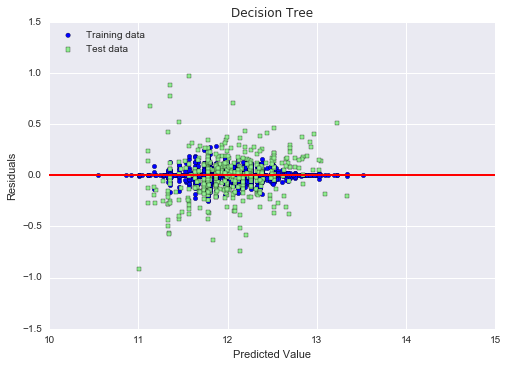

In [598]:
X_train, X_test, y_train, y_test = train_test_split(all_data_X, all_data_y, test_size = 0.3, random_state = 101)

best_tree_model = DecisionTreeRegressor(max_depth = 9)

best_tree_model = best_tree_model.fit(X_train, y_train)
y_train_pred = best_tree_model.predict(X_train)
y_test_pred = best_tree_model.predict(X_test)

print " in sample MSE: ", performance_metrics(y_train, y_train_pred)
print " out of sample MSE: ", performance_metrics(y_test, y_test_pred)

pl.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
pl.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
pl.xlabel ('Predicted Value')
pl.ylabel ('Residuals')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 10, xmax = 15, lw =2, color = 'red')
pl.xlim([10, 15])
pl.title('Decision Tree')
pl.show

In [606]:
# train a randomforesregressor using the default values
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(all_data_X, all_data_y, test_size = 0.3, random_state = 101)

forest = RandomForestRegressor()

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print " in sample MSE: ", performance_metrics(y_train, y_train_pred)
print " out of sample MSE: ", performance_metrics(y_test, y_test_pred)

 in sample MSE:  0.0646102901604
 out of sample MSE:  0.161252434317


In [601]:
# using gridsearchsv to find the optimal randomforestregressior parameters

forest = RandomForestRegressor() 
    
parameters = {'n_estimators': (5,10,15,20), 'max_depth': np.arange(1,10)}
        
forest_optimal = GridSearchCV(estimator = forest, param_grid = parameters, scoring = scoring_function)
    
forest_optimal = forest_optimal.fit(all_data_X, all_data_y)

print "Final model has an optimal max_depth parameter of", forest_optimal.best_params_

Final model has an optimal max_depth parameter of {'n_estimators': 15, 'max_depth': 9}


 in sample MSE:  0.072315410775
 out of sample MSE:  0.159364749526


<function matplotlib.pyplot.show>

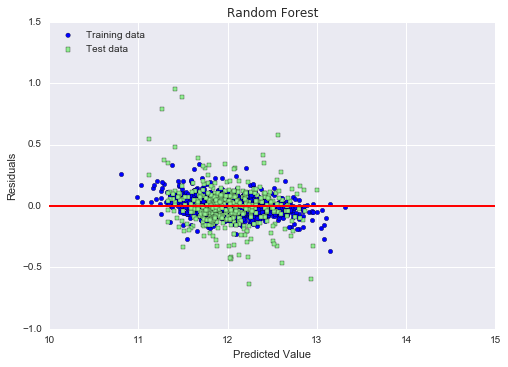

In [603]:
X_train, X_test, y_train, y_test = train_test_split(all_data_X, all_data_y, test_size = 0.3, random_state = 101)

forest = RandomForestRegressor(n_estimators = 15, max_depth = 9)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print " in sample MSE: ", performance_metrics(y_train, y_train_pred)
print " out of sample MSE: ", performance_metrics(y_test, y_test_pred)

pl.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
pl.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
pl.xlabel ('Predicted Value')
pl.ylabel ('Residuals')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 10, xmax = 15, lw =2, color = 'red')
pl.xlim([10, 15])
pl.title('Random Forest')
pl.show

 in sample MSE:  0.094303504015
 out of sample MSE:  0.144505428718


<function matplotlib.pyplot.show>

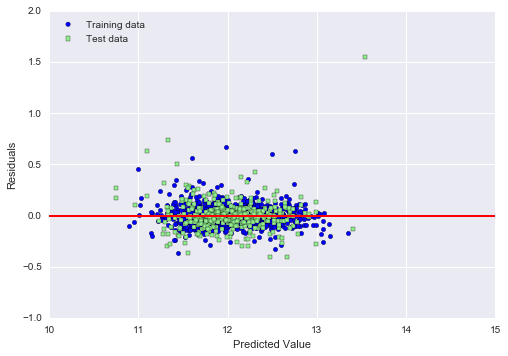

In [581]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(all_data_X, all_data_y, test_size = 0.3, random_state = 101)

ridge = Ridge(normalize = False)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print " in sample MSE: ", performance_metrics(y_train, y_train_pred)
print " out of sample MSE: ", performance_metrics(y_test, y_test_pred)

pl.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
pl.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
pl.xlabel ('Predicted Value')
pl.ylabel ('Residuals')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 10, xmax = 15, lw =2, color = 'red')
pl.xlim([10, 15])
pl.show

In [625]:
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(all_data_X, all_data_y, test_size = 0.3, random_state = 101)

regr = linear_model.BayesianRidge()
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

print " in sample MSE: ", performance_metrics(y_train, y_train_pred)
print " out of sample MSE: ", performance_metrics(y_test, y_test_pred)

 in sample MSE:  0.0989841035725
 out of sample MSE:  0.143736580824


In [624]:
regr = linear_model.BayesianRidge()
    
parameters = {'n_iter': (100, 200, 300, 400, 500), 'fit_intercept': (True, False), 'normalize': (True, False)}
        
regr_optimal = GridSearchCV(estimator = regr, param_grid = parameters, scoring = scoring_function)
    
regr_optimal = regr_optimal.fit(all_data_X, all_data_y)

print "Final model has an optimal max_depth parameter of", regr_optimal.best_params_

Final model has an optimal max_depth parameter of {'normalize': True, 'n_iter': 100, 'fit_intercept': False}


 in sample MSE:  0.0967039498892
 out of sample MSE:  0.144818750536


<function matplotlib.pyplot.show>

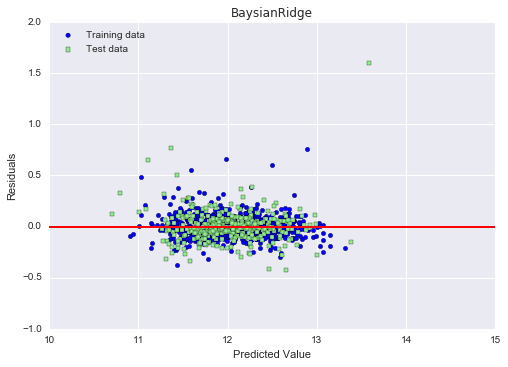

In [740]:
regr_optimal = linear_model.BayesianRidge(n_iter = 100, normalize = True, fit_intercept = False)
regr_optimal.fit(X_train[selected_features], y_train)

y_train_pred = regr_optimal.predict(X_train[selected_features])
y_test_pred = regr_optimal.predict(X_test[selected_features])

print " in sample MSE: ", performance_metrics(y_train, y_train_pred)
print " out of sample MSE: ", performance_metrics(y_test, y_test_pred)

pl.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
pl.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
pl.xlabel ('Predicted Value')
pl.ylabel ('Residuals')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 10, xmax = 15, lw =2, color = 'red')
pl.xlim([10, 15])
pl.title("BaysianRidge")
pl.show

In [665]:
from sklearn.ensemble import AdaBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(all_data_X, all_data_y, test_size = 0.3, random_state = 101)

booster = AdaBoostRegressor(Ridge(), random_state = 101, 
                               n_estimators = 20, learning_rate = 0.1)
booster.fit(X_train, y_train)

y_train_pred = booster.predict(X_train)
y_test_pred = booster.predict(X_test)

print " in sample MSE: ", performance_metrics(y_train, y_train_pred)
print " out of sample MSE: ", performance_metrics(y_test, y_test_pred)

 in sample MSE:  0.0958313315275
 out of sample MSE:  0.15010920758


In [684]:
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(all_data_X, all_data_y, test_size = 0.3, random_state = 101)

svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)

y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

print " in sample MSE: ", performance_metrics(y_train, y_train_pred)
print " out of sample MSE: ", performance_metrics(y_test, y_test_pred)

 in sample MSE:  0.0998761539048
 out of sample MSE:  0.153140939845


In [702]:
svr = SVR()
    
parameters = {'kernel': ('linear', 'poly', 'rbf'), 'gamma' : (0.1, 0.2), "C": (1, 5, 10)}
        
svr_optimal = GridSearchCV(estimator = svr, param_grid = parameters, scoring = scoring_function)
    
svr_optimal = svr_optimal.fit(all_data_X, all_data_y)

print "Final model has an optimal max_depth parameter of", svr_optimal.best_params_

Final model has an optimal max_depth parameter of {'kernel': 'linear', 'C': 1, 'gamma': 0.1}


 in sample MSE:  0.0998761539048
 out of sample MSE:  0.153140939845


<function matplotlib.pyplot.show>

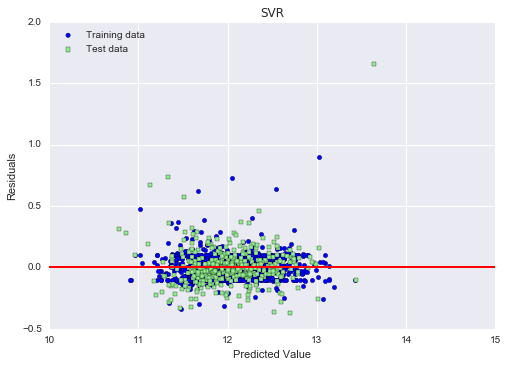

In [703]:
svr_optimal = SVR(kernel = 'linear', C = 1, gamma = 0.1)
svr_optimal.fit(X_train, y_train)

y_train_pred = svr_optimal.predict(X_train)
y_test_pred = svr_optimal.predict(X_test)

print " in sample MSE: ", performance_metrics(y_train, y_train_pred)
print " out of sample MSE: ", performance_metrics(y_test, y_test_pred)

pl.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
pl.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
pl.xlabel ('Predicted Value')
pl.ylabel ('Residuals')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 10, xmax = 15, lw =2, color = 'red')
pl.xlim([10, 15])
pl.title("SVR")
pl.show

In [667]:
from sklearn.ensemble import GradientBoostingRegressor

gbrlad = GradientBoostingRegressor()
gbrlad = gbrlad.fit(X_train, y_train)

y_train_pred = gbrlad.predict(X_train)
y_test_pred = gbrlad.predict(X_test)

print " in sample MSE: ", performance_metrics(y_train, y_train_pred)
print " out of sample MSE: ", performance_metrics(y_test, y_test_pred)

 in sample MSE:  0.0767577720113
 out of sample MSE:  0.137883665212


In [666]:
gbr = GradientBoostingRegressor() 
    
parameters = {'n_estimators': (10, 50, 100, 200, 500), 'learning_rate': (0.01, 0.05, 0.1, 0.15, 0.2)}
        
gbr_optimal = GridSearchCV(estimator = gbr, param_grid = parameters, scoring = scoring_function)
    
gbr_optimal = gbr_optimal.fit(all_data_X, all_data_y)

print "Final model has an optimal max_depth parameter of", gbr_optimal.best_params_

Final model has an optimal max_depth parameter of {'n_estimators': 500, 'learning_rate': 0.1}


 in sample MSE:  0.0347101282407
 out of sample MSE:  0.129849512029


<function matplotlib.pyplot.show>

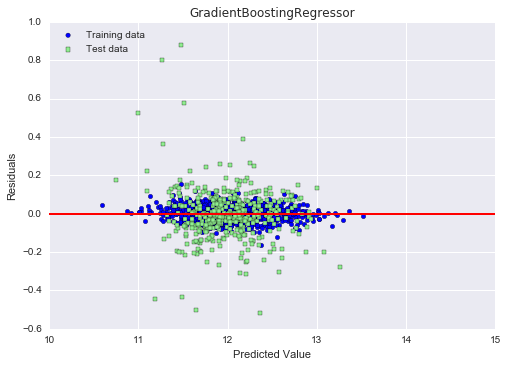

In [726]:
gbr_optimal = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.1, random_state = 101)
gbr_optimal = gbr_optimal.fit(X_train[selected_features], y_train)

y_train_pred = gbr_optimal.predict(X_train[selected_features])
y_test_pred = gbr_optimal.predict(X_test[selected_features])

print " in sample MSE: ", performance_metrics(y_train, y_train_pred)
print " out of sample MSE: ", performance_metrics(y_test, y_test_pred)

pl.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
pl.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test data')
pl.xlabel ('Predicted Value')
pl.ylabel ('Residuals')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 10, xmax = 15, lw =2, color = 'red')
pl.xlim([10, 15])
pl.title('GradientBoostingRegressor')
pl.show

In [395]:
# define functions to reverse the databack to the orignal prices
def reverse_test_result(pred):
    predictions = np.expm1(pred)
    
    return predictions

In [396]:
# result 1

ridge = Ridge(normalize = True)
ridge.fit(all_data_X, all_data_y)
test_pred = ridge.predict(df_test)

#forest = RandomForestRegressor( n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)

#forest.fit(selected_data_X, all_data_y)
#test_pred = forest.predict(selected_df_test1)

results = reverse_test_result(test_pred)

In [743]:
# result 2 when normalize is True
# result 5 when normalize = True
regr = linear_model.BayesianRidge(normalize = True)
regr.fit(all_data_X[selected_features], all_data_y)
test_pred = regr.predict(df_test[selected_features])

results = reverse_test_result(test_pred)

In [733]:
# result 4
gbr = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.1, random_state = 101)
gbr = gbrlad.fit(all_data_X[selected_features], all_data_y)

test_pred = gbrlad.predict(df_test[selected_features])

results = reverse_test_result(test_pred)

In [744]:
results

array([ 120173.7131855 ,  144292.57747459,  179885.74537827, ...,
        163002.75945846,  118139.82650211,  213710.24159364])

In [745]:
results_submission = pd.DataFrame(data = results, index = df_test.index, columns = ['SalePrice'])

In [746]:
pd.isnull(results_submission).any()

SalePrice    False
dtype: bool

In [747]:
results_submission.to_csv('result5.csv')

In [748]:
results_submission.describe()

,SalePrice
count,1459.000000
mean,178162.970091
std,77567.945126
min,38800.579295
25%,126778.305706
50%,159359.822025
75%,207650.134923
max,650635.492043
